In [1]:
#%%capture
%run input/Format.ipynb
import ROOT as root
from array import array
root.gErrorIgnoreLevel = root.kFatal
%jsroot on

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


Welcome to JupyROOT 6.30/06


In [2]:
sub_koeff=0.95
sub_koeff_or = 0.95
skip_thermal = True
shift0 = 0
add_bg = True
iOPT = 9

m_min, m_max = 0.5, 3.8
window_nbins = 20

keff_bg0 = 0.03  # your current BG residual factor

keffs = [1,1.,1,1,1e-7,0.10e-7,1,1,1.5e-7,1,1,1]
keffs = [1,1.5,1,1.35,1e-7,0.10e-7,1,1,1.5e-7,1,1,1]

In [3]:
component_cfg = {
    "thermal": {
        "isim": 8,
        "m_min": m_min,
        "m_max": 5.0,
        "lambda_prior": 2.0,
        "k_min": 0.1,
        "k_max": 5.0,
    },
    "ccbar": {
        "isim": 4,
        "m_min": m_min,
        "m_max": 5.0,
        "lambda_prior": 2.0,  # can start quite strong if you want small deviations
        "k_min": 0.1,
        "k_max": 5.,
    },
    "bbbar": {
        "isim": 5,
        "m_min": m_min,
        "m_max": 5.0,
        "lambda_prior": 2.0,
        "k_min": 0.1,
        "k_max": 5,
    },
    "phi": {
        "isim": 1,
        "m_min": 0.8,
        "m_max": 1.1,
        "lambda_prior": 5e11,   # stronger prior, narrow region; for not using in fit lambda should be set very high
        "k_min": 0.9,
        "k_max": 1.1,
    },
    "jpsi": {
        "isim": 3,
        "m_min": 2.6,
        "m_max": 3.2,
        "lambda_prior": 5e11,
        "k_min": 0.9,
        "k_max": 1.1,
    },
    
}


In [4]:
iOption0 = 10

In [5]:
write_html = False
save_to_pdf = False
print_logo = False

In [6]:
centralities = ["0%-93%","0%-40%","20-40%","40-60%","60-93%","40%-93%"]
Opt_names = ["std", "basic","tight", "std"]
Hists_names = ["m_{ee}_stat","m_{ee}_syst","dca_stat","dca_syst","dca_{J/#Psi}_stat","dca_{J/#Psi}_syst"]
part_names = ["#pi^{0} #rightarrow ee#gamma","#phi #rightarrow ee & #etaee","#phi #rightarrow #etaee","J/#psi  #rightarrow ee",\
              "c#bar{c} #rightarrow ee","b#bar{b} #rightarrow ee","#omega #rightarrow ee & #pi^{0}ee","#omega #rightarrow #pi^{0}ee","QGP",\
              "#eta #rightarrow ee#gamma", "#rho #rightarrow ee","#pi^{-}","#gamma #rightarrow ee","kek"]

In [7]:
N_centr = 6
N_options = 6
N_pt = 1
colors0=[1,2,root.kGreen+2,4,root.kMagenta,root.kOrange+4,root.kGray,root.kGray,root.kBlack,root.kYellow,root.kViolet,root.kCyan,root.kGreen,root.kOrange]
colors=[2,4,4,root.kGreen+2,root.kOrange+4,root.kMagenta,root.kGray,root.kGray,root.kBlack,root.kCyan,root.kOrange,root.kViolet,root.kCyan,root.kGreen,root.kOrange]
central_bins = [0,20,60,80,20,40,40,60,60,80,80,100]
pt_boarders = [0.4,0.7,1.0,2.0,0,5.0,1.0,5.0,0.5,5]
file_path="input/data/"
file_names=["m_ee_DCA_16.root","m_ee_DCA_17.root","m_ee_DCA_18.root","m_ee_DCA_19.root"]#,"m_ee_DCA_16.root","m_ee_DCA_27.root","m_ee_DCA_23.root","m_ee_DCA_3.root"]#["m_ee_DCA_1.root","m_ee_DCA_3.root","m_ee_DCA_4.root"]
#file_names=["m_ee_DCA_26.root","m_ee_DCA_27.root","m_ee_DCA_28.root","m_ee_DCA_19.root"]#,"m_ee_DCA_16.root","m_ee_DCA_27.root","m_ee_DCA_23.root","m_ee_DCA_3.root"]#["m_ee_DCA_1.root","m_ee_DCA_3.root","m_ee_DCA_4.root"]
file_names=["m_ee_DCA_40.root","m_ee_DCA_31.root","m_ee_DCA_30.root","m_ee_DCA_12.root","m_ee_DCA_11.root","m_ee_DCA_4.root"]
sim_file_path="../sim/output/Newembed/invmass/decomposition/HIPWG/"
sim_file_names=['dalitz_50M_v2.root', 'phi_50M_v2.root', "phi_etaee_10M_v1.root", 'jpsi_50M_v4.root', 'ccbar_50M_v0.root', 'bbbar_10M_v1.root',\
                 'omega_10M_v1.root', 'omega_pi0ee_10M_v1.root', 'thermal_25M_v2.root', 'eta_10M_v1.root', 'rho_10M_v1.root', '../bbbar_10M_v0.root']#thermal_25M_200_v0
sim_file_names=['../../../../summer25/invmass/mass/pi0_gee_100M_v03.root', '../../../../summer25/invmass/mass/phi_ee_25M_v01.root', "phi_etaee_10M_v1.root", \
                '../../../../summer25/invmass/mass/jpsi_ee_25M_v06_7.root', '../../../../summer25/invmass/mass/ccbar_sdca_50M_v03.root', '../../../../summer25/invmass/mass/bbbar_10M_v01.root',\
                 'omega_10M_v1.root', 'omega_pi0ee_10M_v1.root', '../../../../summer25/invmass/mass/thermal_sdca_500_50M_v03.root', '../../../../summer25/invmass/mass/eta_gee_50M_v02.root', 'rho_10M_v1.root', '../../../../summer25/invmass/mass/eta_gee_50M_v01.root']#thermal_25M_200_v0
sim_file_names=['../../../../summer25/invmass/mass/pi0_gee_100M_v03.root', '../../../../fall25/dca/phi_25M_v02.root', "phi_etaee_10M_v1.root", \
                '../../../../fall25/dca/jpsi_25M_v02.root', '../../../../fall25/dca/ccbar_soft_v02.root', '../../../../fall25/dca/bbbar_v02.root',\
                 'omega_10M_v1.root', 'omega_pi0ee_10M_v1.root', '../../../../fall25/dca/thermal_300_v02.root', '../../../../summer25/invmass/mass/eta_gee_50M_v02.root', 'rho_10M_v1.root', '../../../../summer25/invmass/mass/eta_gee_50M_v01.root']#thermal_25M_200_v0
file_order = [0,9, 10, 6, 7, 1, 2, 3, 4, 5, 8]
hist_names = ["inv_mass_stat","inv_mass_syst","dca_stat_0","dca_syst_0","dca_stat_1","dca_syst_1","inv_mass_FG","inv_mass_BG","reb_ratio_FG_BG","syst_reb_ratio_FG_BG","dca_BG_0"]
hist_select_3D_names = ["inv_mass_dca_fg1_6","inv_mass_dca_fg1_5","inv_mass_dca_fg1_6","inv_mass_dca_fg1_7","inv_mass_dca_fg1_8","inv_mass_dca_fg1_9",\
                        "inv_mass_dca_fg2_6","inv_mass_dca_fg2_5","inv_mass_dca_fg2_6","inv_mass_dca_fg2_7","inv_mass_dca_fg2_8","inv_mass_dca_fg2_9",\
                        "inv_mass_dca_fg3_6","inv_mass_dca_fg3_5","inv_mass_dca_fg3_6","inv_mass_dca_fg3_7","inv_mass_dca_fg3_8","inv_mass_dca_fg3_9",\
                        "inv_mass_dca_gen_6","inv_mass_dca_gen_5","inv_mass_dca_gen_6","inv_mass_dca_gen_7","inv_mass_dca_gen_8","inv_mass_dca_gen_9"]
N_type = len(hist_names)
N_hists = len(hist_select_3D_names)

In [8]:
dNdy = [41.4,0.421,0.759/1000.,0.12,0.01,3.65,10,0.133/1000]
dNdy = [95./257*42.2,0.421,0.421,0.759/1000.,0.12,0.01,3.65,3.65,10,11./257*42.2,8.6*42/257,0.133/1000]
Ncolls = [251,771,282.4,82.6,12.1,40]
Br_to_ee = [1.174e-2, 2.97e-4, 1.08e-4, 5.94e-2, 0.01, 0.01, 7.28e-5, 7.7e-4, 1e-2, 6.9e-3, 4.73e-5, 7.9e-3]
RAA = [[0.4,0.8,0.4,0.4,0.4,0.4,0.4,0.4],[0.3,0.6,0.3,0.3,0.3,0.3,0.3,0.3],[0.4,0.8,0.4,0.4,0.4,0.4,0.4,0.4],[0.8,1.2,0.8,0.8,0.8,0.8,0.8,0.8],[0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9],[0.9,1.1,0.8,0.9,0.9,0.9,0.9,0.9]]
dNdy_centr = [[dNdy[i]*Ncolls[j]/42.2 for i in range(len(Br_to_ee))] for j in range(6)]

In [9]:
def copycat_hist(hist,seed=0):
    seed += root.gRandom.Integer(10000)
    new_hist = root.TH3D(hist.GetName()+f"{seed}", hist.GetTitle()+f"{seed}", hist.GetNbinsX(), hist.GetXaxis().GetBinLowEdge(1), hist.GetXaxis().GetBinUpEdge(hist.GetNbinsX()),\
        hist.GetNbinsY(), hist.GetYaxis().GetBinLowEdge(1), hist.GetYaxis().GetBinUpEdge(hist.GetNbinsY()),\
        hist.GetNbinsZ(), hist.GetZaxis().GetBinLowEdge(1), hist.GetZaxis().GetBinUpEdge(hist.GetNbinsZ()))
    for ix in range(1, hist.GetNbinsX()+1):
        for iy in range(1, hist.GetNbinsY()+1):
            for iz in range(1, hist.GetNbinsZ()+1):
                new_hist.SetBinContent(ix, iy, iz, hist.GetBinContent(ix, iy, iz))
    return new_hist

In [10]:
hists_read = []

for iFile in range(len(file_names)):
    infile = root.TFile.Open(file_path+file_names[iFile], "read")
    hists_emc_read0 = []
    for itype in range(N_type):
        hist_select_3D0 = []
        for icentr in range(N_centr):
            hist_select_3D0.append(infile.Get(hist_names[itype]+f"_{icentr}{0}"))
            try: hist_select_3D0[-1].SetDirectory(root.nullptr)
            except: 
                print(f"Error setting directory for {hist_names[itype]}_{icentr}{0} in file {file_names[iFile]}")
                break
            hist_select_3D0[-1].SetName(hist_select_3D0[-1].GetName()+f"{iFile}")
        hists_emc_read0.append(hist_select_3D0)
    hists_read.append(hists_emc_read0)

    infile.Close()

hists_sim = []

for iFile in range(len(sim_file_names)):
    infile = root.TFile.Open(sim_file_path+sim_file_names[iFile], "read")
    hists_sim_file = []
    for ihist in range(N_hists):
        hists_sim_file.append(infile.Get(hist_select_3D_names[ihist]))
        hists_sim_file[-1].SetDirectory(root.nullptr)
        hists_sim_file[-1].SetName(hists_sim_file[-1].GetName()+f"_sim_{iFile}")
        if ihist%6==0:hists_sim_file[-1].SetName(hists_sim_file[-1].GetName()+f"_sim_{iFile}_{1}")
        if ihist%6==5:hists_sim_file[-1].SetName(hists_sim_file[-1].GetName()+f"_sim_{iFile}_{0}")
    hists_sim.append(hists_sim_file)
    infile.Close()

Error setting directory for dca_stat_1_00 in file m_ee_DCA_40.root
Error setting directory for dca_syst_1_00 in file m_ee_DCA_40.root
Error setting directory for dca_stat_1_00 in file m_ee_DCA_4.root
Error setting directory for dca_syst_1_00 in file m_ee_DCA_4.root


In [11]:
edges = array('d', [
    0.,0.025,0.05,0.075,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.7,0.75,0.8,0.9,0.95,1.0,1.05,
    1.15,1.3,1.5,1.75,2.0,2.25,2.5,2.75,2.9,3.0,3.05,3.1,3.15,3.2,3.3,3.45,
    3.55,3.65,3.75,3.85,4.5
])

nbins = len(edges) - 1

In [12]:
hist_names3d = [f"inv_mass_ee_DCA_V{iOPT}_FG12",f"inv_mass_ee_DCA_V{iOPT}_BG12","PoolStatistics"]
hists_read_3d = []

for iFile in range(len(file_names)):
    infile = root.TFile.Open(file_path+file_names[iFile], "read")
    hists_emc_read0 = []
    for itype in range(len(hist_names3d)):
        hists_emc_read0.append(infile.Get(hist_names3d[itype]))#+f"_{icentr}{0}"
        try: hists_emc_read0[-1].SetDirectory(root.nullptr)
        except: 
            print(f"Error setting directory for {hist_names3d[itype]} in file {file_names[iFile]}")
            break
        hists_emc_read0[-1].SetName(hists_emc_read0[-1].GetName()+f"{iFile}")
    hists_read_3d.append(hists_emc_read0)

    infile.Close()

Error setting directory for inv_mass_ee_DCA_V9_FG12 in file m_ee_DCA_31.root
Error setting directory for inv_mass_ee_DCA_V9_FG12 in file m_ee_DCA_30.root
Error setting directory for inv_mass_ee_DCA_V9_FG12 in file m_ee_DCA_12.root
Error setting directory for inv_mass_ee_DCA_V9_FG12 in file m_ee_DCA_11.root
Error setting directory for inv_mass_ee_DCA_V9_FG12 in file m_ee_DCA_4.root


In [13]:
sim_qgp = hists_sim[8][0+shift0].ProjectionY(hists_sim[8][0+shift0].GetName()+f"_proj{8}_keks",1,80,1,25)
sim_ccb = hists_sim[4][0+shift0].ProjectionY(hists_sim[4][0+shift0].GetName()+f"_proj{4}_keks",1,80,1,25)
low_bin = sim_ccb.FindBin(1.2); high_bin = sim_ccb.FindBin(2.6)
keff_adjust = sim_qgp.Integral(low_bin,high_bin)*keffs[8]/(sim_ccb.Integral(low_bin,high_bin)*keffs[4]+1e-24)
print(f"keff_adjust = {keff_adjust}")
keffs[8] = keffs[8]/keff_adjust

keff_adjust = 0.9122500817797037


In [14]:
#checking DCA projections in m_ee bins this method vs other code : all good!
rebin = 1
keff = 0.03
iOpt = 0
m_ee_low = 1.05
m_ee_high = 2.6
shift = shift0
sim_dca = [1,3,4,5,8]#phi, jpis, ccbar, bbar, thermal
c3 = root.TCanvas(f"c2",f"c2",900,900)
c3.Divide(1,1)
legends =[]
proj_mass = hists_read_3d[0][0].ProjectionX(f"inv_mass_for_bin_centr_{0}{0}")
bin_low, bin_up = proj_mass.FindBin(m_ee_low), proj_mass.FindBin(m_ee_high)
new_DCA_bins = array( 'd', [0,25,50,75,100,125,150,175,225,275,375,475,750,1000])
for icentr in range(1):
    maxim = 0
    for jtype in range(1):
        
        do_jpsi_m = jtype
        pt_low_loc, pt_high_loc = 1, 12
        phi_v_low_loc, phi_v_high_loc = bin_low, bin_up
        #print(inv_m_bins[phi_v_low-1],inv_m_bins[phi_v_high])
        c3.cd(icentr+1)
        proj = hists_read_3d[iOpt][0].ProjectionY(f"dca_stat_{jtype}_{icentr}{iOpt}",phi_v_low_loc,phi_v_high_loc,pt_low_loc, pt_high_loc)
        proj_syst = hists_read_3d[iOpt][0].ProjectionY(f"dca_syst_{jtype}_{icentr}{iOpt}",phi_v_low_loc,phi_v_high_loc,pt_low_loc, pt_high_loc)
        proj_BG = hists_read_3d[iOpt][1].ProjectionY(f"dca_BG_{jtype}_{icentr}{iOpt}",phi_v_low_loc,phi_v_high_loc,pt_low_loc, pt_high_loc)
        proj_BG.Scale(1.0)


        proj = proj.Rebin(len(new_DCA_bins)-1,proj.GetName()+"_reb",new_DCA_bins)
        proj_syst = proj_syst.Rebin(len(new_DCA_bins)-1,proj_syst.GetName()+"_reb",new_DCA_bins)
        proj_BG = proj_BG.Rebin(len(new_DCA_bins)-1,proj_BG.GetName()+"_reb",new_DCA_bins)

        for ibin in range (1,1+proj.GetNbinsX()):
            proj.SetBinError(ibin,abs(proj.GetBinContent(ibin))**0.5)
            proj_BG.SetBinError(ibin,abs(proj_BG.GetBinContent(ibin))**0.5)
            proj.SetBinContent(ibin,proj.GetBinContent(ibin)/proj.GetBinWidth(ibin))
            proj_BG.SetBinContent(ibin,proj_BG.GetBinContent(ibin)/proj_BG.GetBinWidth(ibin))
            proj.SetBinError(ibin,proj.GetBinError(ibin)/proj.GetBinWidth(ibin))
            proj_BG.SetBinError(ibin,proj_BG.GetBinError(ibin)/proj_BG.GetBinWidth(ibin))

        Format_Hist_total(proj,"DCA, #mum","dN/DCA, #mum^{-1}",0.17,0.13,0.01,0.01,0.07,0.06,21,1.5,4-jtype*3,3,4-jtype*3,0.85,1.2)

        Format_Graph(proj_BG,20,1.5,2+jtype*4,3,2+jtype*4)
        if True: 

            proj.Scale(1./hists_read_3d[iOpt][2].GetBinContent(2))
            proj_BG.Scale(sub_koeff/hists_read_3d[iOpt][2].GetBinContent(2))
            proj.Add(proj_BG,-1+keff)

        if not maxim: maxim = proj.GetBinContent(proj.FindBin(0))+proj.GetBinContent(proj.FindBin(0)+1)
        

        for ibin in range (1,1+proj.GetNbinsX()):
            proj_syst.SetBinContent(ibin,proj.GetBinContent(ibin))
            proj_syst.SetBinError(ibin,proj_BG.GetBinContent(ibin)/100.)

        root.gPad.SetLogy(1)
        if jtype==0: proj.Draw("p")
        else: proj.Draw("same p")
        hists_read[iOpt][2][0].GetXaxis().SetRangeUser(0,1000)
        hists_read[iOpt][2][0].GetYaxis().SetRangeUser(2e-14,9e-8)
        hists_read[iOpt][2][0].SetMarkerColor(6); hists_read[iOpt][2][0].SetMarkerStyle(20); hists_read[iOpt][2][0].SetMarkerSize(1.)
        hists_read[iOpt][2][0].Draw("same p")
        proj_syst.SetFillColorAlpha(4-jtype*3,0.4)
        proj_syst.Draw("same e2")
        proj.SetLineWidth(3)
        #print(proj.GetMean(),proj.GetRMS(),proj_BG.GetMean(),proj_BG.GetRMS())
        proj_BG.SetLineWidth(3)
        proj_BG.SetLineColor(2)
        proj.SetAxisRange(-2000,2000)
        proj.SetAxisRange(0,900)
        if keff > 0:
            proj_BG.Scale(keff)
            proj_BG.Draw("same p")
        proj.GetXaxis().SetNdivisions(505)
        proj.GetYaxis().SetNdivisions(50510)
        if jtype == 0:
            legends.append(root.TLegend(0.55,0.6,0.95,0.95,centralities[icentr]))
            Format_Legend(legends[-1],0.08)
        legends[icentr].AddEntry(proj,f"{proj_mass.GetBinCenter(bin_low):.2f}"+"<m_{inv}<"+f"{proj_mass.GetBinCenter(bin_up):.2f}","p")
        if keff > 0:
            legends[icentr].AddEntry(proj,f"{proj_mass.GetBinCenter(bin_low):.2f}"+"<m_{inv}<"+f"{proj_mass.GetBinCenter(bin_up):.2f}","p")
        legends[icentr].Draw()


        
        sum_sim_proj = hists_sim[0][icentr].ProjectionX(hists_sim[len(sim_file_names)-1][icentr].GetName()+"_proj1_dca_tot_new") 
        sum_sim_proj.Add(sum_sim_proj,-1)
        sim_bin_low = hists_sim[0][icentr].GetYaxis().FindBin(m_ee_low)
        sim_bin_up = hists_sim[0][icentr].GetYaxis().FindBin(m_ee_high)
        for isim in sim_dca:
            if skip_thermal and isim == 8: continue
            sim_proj = hists_sim[isim][icentr].ProjectionX(hists_sim[isim][icentr].GetName()+"_proj1_new_dca",sim_bin_low,sim_bin_up,1,25) 
            sim_proj.Scale(0.)
            h_stat = copycat_hist(hists_sim[isim][icentr+18])
            h_stat.Scale(0.)
            for jsim in range(1,6):
                sim_proj.Add(hists_sim[isim][shift+jsim].ProjectionX(hists_sim[isim][shift+jsim].GetName()+f"_proj1_new_{isim}{iOpt}",sim_bin_low,sim_bin_up,1,25),
                             10./sim_proj.GetBinWidth(1)*keffs[isim])
                h_stat.Add(hists_sim[isim][jsim+18])
            sim_proj.Scale(1./h_stat.GetEntries())
            #sim_proj.Scale(10./sim_proj.GetBinWidth(1)/hists_sim[isim][icentr+18].GetEntries()*keffs[icentr][isim])
            Format_Graph(sim_proj,21+isim,0,colors[isim],3,colors[isim])
            sum_sim_proj.Add(sim_proj,1)
            sim_proj.Draw("same H")
            legends[-1].AddEntry(sim_proj,part_names[isim],"l")
        
        if add_bg:
            Format_Graph(hists_read[iOpt][10][icentr],21,1.5,root.kCyan,3,root.kCyan)
            hists_read[iOpt][10][icentr].Draw("same")
            #sum_sim_proj.Add(hists_read[iOpt][9][icentr],1)
            for ibin in range(1,sum_sim_proj.GetNbinsX()+1):
                jbin = hists_read[iOpt][10][icentr].FindBin(sum_sim_proj.GetBinCenter(ibin))
                bin_additive= hists_read[iOpt][10][icentr].GetBinContent(jbin)#/hists_read[iOpt][10][icentr].GetBinWidth(jbin)*sum_sim_proj.GetBinWidth(ibin)
                sum_sim_proj.SetBinContent(ibin,sum_sim_proj.GetBinContent(ibin)+bin_additive)
        Format_Graph(sum_sim_proj,21,0,2,3,2)
        for ibin in range(1,sum_sim_proj.GetNbinsX()+1):
            sum_sim_proj.SetBinError(ibin, 0.1*sum_sim_proj.GetBinContent(ibin))
        sum_sim_proj.Draw("same H")

c3.Draw()

In [15]:
import numpy as np

# configuration
rebin = 1
pt_low_loc_data, pt_high_loc_data = 1, 12
pt_low_loc_sim,  pt_high_loc_sim  = 1, 25

# phi and J/psi allowed mass ranges
phi_lo,  phi_hi  = 0.5, 1.05
jpsi_lo, jpsi_hi = 2.6, 3.2

# indexes of templates in hists_sim
sim_dca = [1,3,4,5,8]  # phi, jpsi, ccbar, bbar, thermal

# centrality (you currently loop only icentr in range(1))
icentr = 0

# Get mass axis (data)
proj_mass = hists_read_3d[iOpt][0].ProjectionX("inv_mass_for_bins_tmp")
nbins_mass = proj_mass.GetNbinsX()

# helper: build sliding windows in mass-bin indices and their mass centers
mass_windows = []
h3_data = hists_read_3d[0][0]          # data TH3
ax_m_data = h3_data.GetXaxis()         # assume X is m_ee

h3_data = hists_read_3d[0][0]
ax_m_data = h3_data.GetXaxis()

first_bin = ax_m_data.FindBin(m_min)
last_bin_for_center = ax_m_data.FindBin(m_max)

mass_windows = []
for ibin_start in range(first_bin,
                        last_bin_for_center - window_nbins + 2):
    ibin_end = ibin_start + window_nbins - 1

    m_lo = ax_m_data.GetBinLowEdge(ibin_start)
    m_hi = ax_m_data.GetBinUpEdge(ibin_end)
    m_ctr = 0.5 * (m_lo + m_hi)

    # optional: clamp to [m_min, m_max] exactly
    m_lo = max(m_lo, m_min)
    m_hi = min(m_hi, m_max)

    mass_windows.append((m_lo, m_hi, m_ctr))



In [16]:
def make_data_dca_hist(m_lo, m_hi,
                       icentr=0,
                       iOpt=0,
                       rebin=1,
                       pt_low=1, pt_high=12,
                       keff_bg=0.03,
                       sub_koeff=sub_koeff,
                       nev_bin=2):
    """
    Build DCA 1D hist for data in a given mass window [m_lo, m_hi],
    using the same logic as your DCA macro:

      - project FG and BG from hists_read_3d
      - rebin
      - convert to per-µm (divide by bin width)
      - scale by 1/N_events (hists_read_3d[iOpt][2].GetBinContent(nev_bin))
      - subtract (sub_koeff - keff_bg) * BG, i.e. FG - 0.97 * BG for sub_koeff=1, keff_bg=0.03

    Returns: TH1D with FG - 0.97*BG normalized per event and per µm.
    """

    # 3D histograms: [0]=FG, [1]=BG, [2]=N_events vs centrality
    h3_fg = hists_read_3d[iOpt][0]
    h3_bg = hists_read_3d[iOpt][1]

    # mass axis is X
    ax_m = h3_fg.GetXaxis()
    bin_low = ax_m.FindBin(m_lo)
    bin_up  = ax_m.FindBin(m_hi)

    # protect edges
    if m_lo <= ax_m.GetBinLowEdge(1):
        bin_low = 1
    if m_hi >= ax_m.GetBinUpEdge(ax_m.GetNbins()):
        bin_up = ax_m.GetNbins()

    # project DCA (Y axis), integrate pT (Z axis) over [pt_low, pt_high]
    name_fg = f"dca_stat_{icentr}_{m_lo:.3f}_{m_hi:.3f}"
    name_bg = f"dca_BG_{icentr}_{m_lo:.3f}_{m_hi:.3f}"

    proj    = h3_fg.ProjectionY(name_fg, bin_low, bin_up, pt_low, pt_high)
    proj_bg = h3_bg.ProjectionY(name_bg, bin_low, bin_up, pt_low, pt_high)

    proj.Rebin(rebin)
    proj_bg.Rebin(rebin)

    # per-bin Poisson errors + divide by bin width (per µm)
    for ibin in range(1, proj.GetNbinsX()+1):
        bw = proj.GetBinWidth(ibin)

        c_fg = proj.GetBinContent(ibin)
        e_fg = (abs(c_fg))**0.5

        c_bg = proj_bg.GetBinContent(ibin)
        e_bg = (abs(c_bg))**0.5

        # convert to per µm
        if bw > 0:
            proj.SetBinContent(ibin, c_fg / bw)
            proj.SetBinError(ibin,   e_fg / bw)

            proj_bg.SetBinContent(ibin, c_bg / bw)
            proj_bg.SetBinError(ibin,   e_bg / bw)

    # 1/N_events normalization (same as your code)
    nev = hists_read_3d[iOpt][2].GetBinContent(nev_bin)
    if nev > 0:
        proj.Scale(1.0/nev)
        proj_bg.Scale(sub_koeff/nev)  # this is the BG used for subtraction

    # subtract (1 - keff_bg)*BG  → for sub_koeff=1 this is FG - 0.97*BG
    proj.Add(proj_bg, -1.0 + keff_bg)

    # optional: style in your way here if you want
    # Format_Hist_total(...)

    proj.SetDirectory(0)
    return proj


In [17]:
def make_sim_dca_templates(m_lo, m_hi,
                           icentr=0,
                           sim_dca=None,
                           shift=shift0,
                           rebin=1,
                           pt_low=1, pt_high=25,
                           keffs=None,
                           skip_thermal=False):
    """
    Build DCA templates for simulation components in sim_dca
    for a given mass window [m_lo, m_hi], using the same logic as your macro:

      - project DCA (X) in [m_lo, m_hi] on Y axis (mass axis in sim is Y)
      - sum 5 subsamples (jsim=1..5) with scale factor 10/ΔDCA * keffs[isim]
      - normalize by total h_stat entries
      - rebin
      - (optionally skip thermal)

    Returns: dict {part_names[isim]: TH1D}
    """

    if sim_dca is None:
        # default: use your global list
        sim_dca = [1, 3, 4, 5, 8]

    if keffs is None:
        keffs = [1,2,1,1,1e-7,0.10e-7,1,1,1.5e-7,1,1,1]

    templates = {}

    # we use one of the components just to get the mass axis
    ref_isim = sim_dca[0]
    h3_ref = hists_sim[ref_isim][icentr]
    ax_m_sim = h3_ref.GetYaxis()  # in sim: Y = mass

    sim_bin_low = ax_m_sim.FindBin(m_lo)
    sim_bin_up  = ax_m_sim.FindBin(m_hi)

    for isim in sim_dca:
        if skip_thermal and isim == 8:
            continue

        name_base = hists_sim[isim][icentr].GetName()
        name_proj = f"{name_base}_proj_dca_{m_lo:.3f}_{m_hi:.3f}"

        # base projection for this component
        sim_proj = hists_sim[isim][icentr].ProjectionX(
            name_proj,
            sim_bin_low, sim_bin_up,
            pt_low, pt_high
        )
        sim_proj.SetDirectory(0)
        sim_proj.Scale(0.0)

        # stats hist used to normalize
        h_stat = copycat_hist(hists_sim[isim][icentr+18])
        h_stat.Scale(0.0)

        # sum 5 subsamples as in your macro
        for jsim in range(1, 6):
            h3_sub = hists_sim[isim][shift+jsim]
            name_sub = f"{h3_sub.GetName()}_proj_dca_{isim}_{jsim}"
            sim_sub = h3_sub.ProjectionX(
                name_sub,
                sim_bin_low, sim_bin_up,
                pt_low, pt_high
            )

            # scale factor from your code: 10/ΔDCA * keffs[isim]
            bw = sim_proj.GetBinWidth(1)
            if bw <= 0:
                bw = 1.0

            scale = 10.0 / bw * keffs[isim]
            sim_proj.Add(sim_sub, scale)

            h_stat.Add(hists_sim[isim][jsim+18])

        # normalize by number of events
        if h_stat.GetEntries() > 0:
            sim_proj.Scale(1.0 / h_stat.GetEntries())

        if rebin > 1:
            sim_proj.Rebin(rebin)

        # you may also want per-µm like data:
        # for ibin in range(1, sim_proj.GetNbinsX()+1):
        #     bw = sim_proj.GetBinWidth(ibin)
        #     if bw > 0:
        #         sim_proj.SetBinContent(ibin, sim_proj.GetBinContent(ibin)/bw)

        templates[part_names[isim]] = sim_proj

    return templates


In [18]:
def make_bg03_template_dca(m_lower=1.2, m_upper=2.6, pt_lower = 1, pt_upper = 12, icentr=0, iOpt=0, rebin=1, scale_loc = 0.03):
    """
    Build the 0.03 * BG DCA template you add on top of the cocktail.
    Using hists_read[iOpt][10][icentr] as in your macro.
    """
    bin_low = hists_read_3d[iOpt][1].GetXaxis().FindBin(m_lower)
    bin_up = hists_read_3d[iOpt][1].GetXaxis().FindBin(m_upper)
    #print(f"BG DCA template mass bins: {bin_low}-{bin_up}")
    h_bg1d = hists_read_3d[iOpt][1].ProjectionY(hists_read_3d[iOpt][1].GetName()+f"_{m_lower}_{m_upper}_{scale_loc}", bin_low, bin_up, pt_lower, pt_upper)
    h_bg1d.SetDirectory(0)

    if rebin > 1:
        h_bg1d.Rebin(rebin)
        
    h_bg1d.Scale(scale_loc*sub_koeff_or/hists_read_3d[iOpt][2].GetBinContent(2)/h_bg1d.GetBinWidth(1))  # 3% BG

    return h_bg1d


In [19]:
canvases = []
legends = []
shift = shift0

for ipar in [0]:  # centrality index offset
    c0 = root.TCanvas(f"c1_{ipar}",f"c1_{ipar}",1000,1000)
    c0.Divide(1,1)
    canvases.append(c0)
    iOpt = 0
    rebin = 2

    # base normalizations from integrals
    # IMPORTANT: thermal (isim=8) cannot be 0, otherwise k_corr won't help
    if keffs is None:
        keffs = [1,2,1,1,1e-7,0.10e-7,1,1,1.5e-7,1,1,1]

    for icentr in range(ipar,1+ipar):
        legends.append(root.TLegend(0.2,0.90,0.99,0.96,
                                    "Run 2014 "+centralities[icentr]+" Au+Au #sqrt{s_{NN}} = 200 GeV"))
        Format_Legend(legends[-1],0.04,12)
        legends[-1].Draw()

        legends.append(root.TLegend(0.2, 0.86, 0.99, 0.89,
                                    "|y^{e}|<0.35, p_{T}^{e }>0.4 GeV, p_{T}^{ee}>0.8 GeV"))
        Format_Legend(legends[-1],0.04,12)

        c0.cd(1)
        root.gPad.SetLogy()

        proj = hists_read_3d[iOpt][0].ProjectionX( hists_read_3d[iOpt][0].GetName()+f"_proj_mass{iOpt}{icentr}", 1, 40,1, 12)
        proj_syst = hists_read_3d[iOpt][0].ProjectionX( hists_read_3d[iOpt][0].GetName()+f"_proj_syst_mass{iOpt}{icentr}", 1, 40,1, 12)
        proj_BG = hists_read_3d[iOpt][1].ProjectionX( hists_read_3d[iOpt][1].GetName()+f"_proj_mass{iOpt}{icentr}", 1, 40,1, 12)

        proj    = proj.Rebin(nbins,    proj.GetName()+"proj_reb",    edges)
        proj_syst = proj_syst.Rebin(nbins, proj_syst.GetName()+"proj_syst_reb", edges)
        proj_BG = proj_BG.Rebin(nbins, proj_BG.GetName()+"proj_BG_reb", edges)
    
        for ibin in range (1,1+proj.GetNbinsX()):
            proj.SetBinError(ibin,(proj.GetBinContent(ibin))**0.5)
            keff  = sub_koeff
            if ibin > proj.FindBin(3.4): proj_BG.SetBinContent(ibin,(proj_BG.GetBinContent(ibin))*0.9999)
            proj.SetBinContent(ibin,proj.GetBinContent(ibin) - keff*proj_BG.GetBinContent(ibin)*1)
            proj.SetBinContent(ibin,proj.GetBinContent(ibin)/proj.GetBinWidth(ibin))
            proj.SetBinError(ibin,proj.GetBinError(ibin)/proj.GetBinWidth(ibin))
            proj_syst.SetBinContent(ibin,proj.GetBinContent(ibin))
            proj_BG.SetBinError(ibin,abs(proj_BG.GetBinContent(ibin))**0.5)
            proj_syst.SetBinError(ibin,((proj_BG.GetBinContent(ibin)/100./proj.GetBinWidth(ibin)*1)**2+(proj_BG.GetBinError(ibin)/proj.GetBinWidth(ibin)*1)**2)**0.5)


        if True: 
            proj.Scale(1./hists_read_3d[iOpt][2].GetBinContent(2))
            proj_syst.Scale(1./hists_read_3d[iOpt][2].GetBinContent(2))
            proj_BG.Scale(sub_koeff/hists_read_3d[iOpt][2].GetBinContent(2))


        Format_Hist_total(proj,
                          "m_{e^{+}e^{-}} (GeV)",
                          "dN/dm_{e^{+}e^{-}} (GeV^{-1}) in PHENIX acceptance",
                          0.15,0.15,0.01,0.01,0.05,0.05,
                          21,1.5,1,3,1,0.99,1.55)
        proj.SetMaximum(2e-3)
        proj.SetMinimum(1.001e-10)
        proj.Draw()
        #hists_read[iOpt][0][icentr].Draw("same")
        #hists_read[iOpt][1][icentr].SetFillColorAlpha(1,0.4)
        #hists_read[iOpt][1][icentr].Draw("same e2")
        proj_syst.SetFillColorAlpha(1,0.4); 
        proj_syst.Draw("same e2")

        legends.append(root.TLegend(0.25,0.86,0.45,0.90))
        Format_Legend(legends[-1],0.035,12)
        legends[-1].AddEntry(hists_read[iOpt][0][icentr],"data","p")
        legends[-1].Draw()

        legends.append(root.TLegend(0.06,0.75,0.65,0.86))
        Format_Hist_total(hists_read[iOpt][0][icentr],
                          "m_{e^{+}e^{-}} (GeV)",
                          "dN/dm_{e^{+}e^{-}} (GeV^{-1}) in PHENIX acceptance",
                          0.15,0.15,0.01,0.01,0.05,0.05,
                          21,1.5,1,3,1,0.99,1.55)
        Format_Legend(legends[-1],0.035,12)
        legends[-1].AddEntry(0,"p_{T}^{e }>0.3 GeV","")
        legends[-1].AddEntry(0,"|y^{e}|<0.35","")
        legends[-1].Draw()

        legends.append(root.TLegend(0.4,0.56,0.99,0.905))
        Format_Legend(legends[-1],0.035,12)

        # sum over cocktail components
        sum_sim_proj = hists_sim[len(sim_file_names)-1][icentr].ProjectionY(
            hists_sim[len(sim_file_names)-1][icentr].GetName()+f"_proj{iOpt}",
            1,80,1,25
        )
        sum_sim_proj.Scale(0)

        for isim in range(0, len(sim_file_names)-1):
            if isim in [2,6,7,10]:
                continue  # these sources are excluded

            sim_proj = hists_sim[isim][icentr+shift].ProjectionY(
                hists_sim[isim][icentr+shift].GetName()+f"_proj{isim}{iOpt}",
                1,80,1,25
            )
            sim_proj.Scale(0.)
            h_stat = copycat_hist(hists_sim[isim][icentr+18])
            h_stat.Scale(0.)

            for ihist in range(1,6):
                h_sub = hists_sim[isim][ihist+shift].ProjectionY(
                    hists_sim[isim][ihist+shift].GetName()+f"_proj{isim}{ihist+shift}{iOpt}",
                    1,80,1,25
                )
                scale_base = 10.0 / h_sub.GetBinWidth(1) * keffs[isim] * 0.8
                sim_proj.Add(h_sub, scale_base)
                h_stat.Add(hists_sim[isim][icentr+ihist+18])

            if h_stat.GetEntries() > 0:
                sim_proj.Scale(1.0 / h_stat.GetEntries())

            # --- thermal-only mass-dependent correction
            n_bins = sim_proj.GetNbinsX()

            Format_Graph(sim_proj,21+isim,0,colors[isim],3,colors[isim], Lalpha=0.7)
            if isim > 10:
                sim_proj.Rebin(rebin)

            if not write_html:
                print(f"{h_stat.Integral()/h_stat.GetEntries()/Br_to_ee[isim]*10:.2E},",
                      f"{h_stat.Integral()*keffs[isim]/Br_to_ee[isim]/h_stat.GetEntries()*10:.2E},",
                      f"{dNdy_centr[icentr][isim]:.2E},",
                      f"{h_stat.Integral()*keffs[isim]/Br_to_ee[isim]/dNdy_centr[icentr][isim]/h_stat.GetEntries()*10*100:.0f}%,",
                      part_names[isim])

            sum_sim_proj.Add(sim_proj,1)
            sim_proj.Draw("same H")
            legends[-1].AddEntry(sim_proj,part_names[isim],"l")

        Format_Graph(sum_sim_proj,21,0,colors[isim+1],3,colors[isim+1], Lalpha=0.7)
        sum_sim_proj.Draw("same H")
        legends[-1].AddEntry(sum_sim_proj,"sum","l")
        Format_Legend(legends[-1],0.04,12)
        legends[-1].SetNColumns(2)
        legends[-1].Draw()

        data_yield = proj.Integral(proj.FindBin(1.2), proj.FindBin(2.6), "width")
        sim_yield  = sum_sim_proj.Integral(sum_sim_proj.FindBin(1.2), sum_sim_proj.FindBin(2.6), "width")
        keff_inter_mass = data_yield/(sim_yield+1e-24)

    c0.Draw()
    if save_to_pdf:
        c0.Print(f"output/Note/cocktail_2_keff_massdep.pdf")

c0.SaveAs("output/DCA_templates/mass_res_before_fit.png")


9.58E+01, 9.58E+01, 9.28E+01, 103%, #pi^{0} #rightarrow ee#gamma
2.73E+00, 4.09E+00, 2.50E+00, 163%, #phi #rightarrow ee & #etaee
1.19E-03, 1.61E-03, 4.51E-03, 36%, J/#psi  #rightarrow ee
2.64E+05, 2.64E-02, 7.14E-01, 4%, c#bar{c} #rightarrow ee
2.48E+05, 2.48E-03, 5.95E-02, 4%, b#bar{b} #rightarrow ee
2.67E+05, 4.38E-02, 5.95E+01, 0%, QGP
1.29E+01, 1.29E+01, 1.07E+01, 120%, #eta #rightarrow ee#gamma


In [20]:
keffs[4] = keffs[4]*keff_inter_mass
keffs[5] = keffs[5]*keff_inter_mass
keffs[8] = keffs[8]*keff_inter_mass
print(keff_inter_mass, keffs)

5.283567122808377 [1, 1.5, 1, 1.35, 5.283567122808377e-07, 5.283567122808377e-08, 1, 1, 8.687695230184076e-07, 1, 1, 1]


In [21]:
#function checks for a specific mass window: all good!

m_loc_lo = 1.05
m_loc_hi = 2.6
m_loc_centr = 0.5*(m_loc_lo + m_loc_hi)

# data signal: FG - 0.97*BG
h_data_dca = make_data_dca_hist(m_loc_lo, m_loc_hi,
                                icentr=0,
                                iOpt=0,
                                rebin=1,
                                keff_bg=keff_bg0,
                                sub_koeff=sub_koeff_or)

# sim components (ccbar, bbar, thermal, etc.)
sim_dca = [1, 3, 4, 5, 8]
templates = make_sim_dca_templates(m_loc_lo, m_loc_hi,
                                   icentr=0,
                                   sim_dca=sim_dca,
                                   shift=shift0,
                                   rebin=1,
                                   keffs=keffs,
                                   skip_thermal=False)

# optional BG 3% template
bg03 = make_bg03_template_dca(icentr=0, iOpt=0, rebin=1, scale_loc=keff_bg0, m_lower=m_loc_lo, m_upper=m_loc_hi, pt_lower=1, pt_upper=12)
total_sim = bg03.Clone("total_sim")
for template in templates.values():
    total_sim.Add(template,1)
#plotting
c4 = root.TCanvas(f"c4",f"c4",900,900)
c4.cd(1)
root.gPad.SetLogy(1)
Format_Hist_total(h_data_dca,"DCA_T^{e^{+}e^{-}} (#mum)", "dN/DCA_{T}^{e^{+}e^{-}} (#mum^{-1}) in acceptance",0.17,0.17,0.01,0.01,0.05,0.05,21,1.5,4,3,4,0.99,1.65)
h_data_dca.GetXaxis().SetRangeUser(0,1000)
h_data_dca.GetYaxis().SetRangeUser(2e-14,9e-8)
#new_DCA_bins = array( 'd', [0,25,50,75,100,125,150,175,200,225,275,375,475,750,1000])
#bin_w = h_data_dca.GetBinWidth(1); h_data_dca = h_data_dca.Rebin(len(new_DCA_bins)-1,h_data_dca.GetName()+"_reb",new_DCA_bins)
#for ibin in range (1,1+h_data_dca.GetNbinsX()): h_data_dca.SetBinContent(ibin, h_data_dca.GetBinContent(ibin)*bin_w/h_data_dca.GetBinWidth(ibin)); h_data_dca.SetBinError(ibin, h_data_dca.GetBinError(ibin)*bin_w/h_data_dca.GetBinWidth(ibin))
h_data_dca.Draw("")
Format_Graph(total_sim,21,0,2,3,2)
total_sim.Draw("same H")
legends =[]
legends.append(root.TLegend(0.5,0.65,0.98,0.98,centralities[0]))
Format_Legend(legends[-1],0.04)
legends[-1].AddEntry(h_data_dca,f"{m_loc_lo:.2f}"+"<m_{ee}<"+f"{m_loc_hi:.2f} data","p")
for template, i in zip(templates.values(), range(len(templates)))   :
    Format_Graph(template,21,0,colors[sim_dca[i]],3,colors[sim_dca
                                                           [i]])
    #if i==4: template.Scale(125./168)
    template.Draw("same H")
    legends[-1].AddEntry(template,part_names[sim_dca[i]],"l")
legends[-1].AddEntry(bg03,"0.03#timesBG","p")
legends[-1].AddEntry(total_sim,"Total Sim+bg","l")
Format_Graph(bg03,21,1.5,root.kCyan,3,root.kCyan)

bg03.Draw("same")
legends[-1].Draw()
c4.Draw()


In [22]:
import numpy as np

def fit_window_thermal_only(m_lo, m_hi, m_center,
                            icentr=0,
                            isim_thermal=8,
                            sim_dca=None,
                            shift=shift0,
                            rebin=1,
                            lambda_prior=2.0,
                            k_min=0.1, k_max=300.0):
    """
    Fit ONLY the thermal component in this mass window [m_lo, m_hi].

    Data:    FG - 0.97 * BG          (make_data_dca_hist)
    Sim:     DCA templates           (make_sim_dca_templates)
    Free:    one parameter k_th multiplying the thermal template.
    Others:  fixed to their nominal keffs.

    Returns: k_th (float).
    """

    if sim_dca is None:
        sim_dca = [1, 3, 4, 5, 8]   # phi, ccbar, bbar, thermal, etc.

    # -----------------------------
    # 1) Data histogram (signal)
    # -----------------------------
    h_data = make_data_dca_hist(m_lo, m_hi,
                                icentr=icentr,
                                iOpt=0,
                                rebin=rebin,
                                keff_bg=keff_bg0,   # 3% under-subtraction
                                sub_koeff=sub_koeff_or)
    h_data.SetDirectory(0)

    nbins = h_data.GetNbinsX()
    y   = np.array([h_data.GetBinContent(i) for i in range(1, nbins+1)], dtype=float)
    err = np.array([h_data.GetBinError(i)   for i in range(1, nbins+1)], dtype=float)

    w = np.zeros_like(err)
    mask_err = err > 0
    w[mask_err] = 1.0 / (err[mask_err]**2)
    if mask_err.sum() < 3:
        return 1.0

    # -----------------------------
    # 2) Sim templates
    # -----------------------------
    templates = make_sim_dca_templates(m_lo, m_hi,
                                       icentr=icentr,
                                       sim_dca=sim_dca,
                                       shift=shift0,
                                       rebin=rebin,
                                       keffs=keffs,
                                       skip_thermal=False)

    therm_name = part_names[isim_thermal]
    if therm_name not in templates:
        return 1.0

    h_th = templates[therm_name]
    T_th = np.array([h_th.GetBinContent(i) for i in range(1, nbins+1)], dtype=float)

    # sum of all other components (fixed)
    F_fixed = np.zeros_like(T_th)
    for isim in sim_dca:
        if isim == isim_thermal:
            continue
        name = part_names[isim]
        if name not in templates:
            continue
        h_c = templates[name]
        F_fixed += np.array([h_c.GetBinContent(i) for i in range(1, nbins+1)], dtype=float)

    # effective data after subtracting fixed components
    y_eff = y - F_fixed

    mask = mask_err
    if mask.sum() < 3:
        return 1.0

    y_use = y_eff[mask]
    T_use = T_th[mask]
    w_use = w[mask]

    if np.all(T_use == 0):
        return 1.0

    # -----------------------------
    # 3) Analytic solution with prior k_th ~ 1
    # -----------------------------
    a = np.sum(w_use * T_use * T_use)
    b = np.sum(w_use * T_use * y_use)

    if a + lambda_prior == 0:
        return 1.0

    k_th = (b + lambda_prior * 1.0) / (a + lambda_prior)

    # enforce non-negative and clip to [k_min, k_max]
    k_th = float(np.clip(k_th, k_min, k_max))
    return k_th


In [23]:
k_th_raw = []
m_centers = []

for iw, (m_lo, m_hi, m_center) in enumerate(mass_windows):
    k_th = fit_window_thermal_only(m_lo, m_hi, m_center,
                                   icentr=0,
                                   isim_thermal=8,
                                   sim_dca=[1,3,4,5,8],
                                   shift=shift0,
                                   rebin=1,
                                   lambda_prior=2.0,
                                   k_min=0.1, k_max=300.0)
    k_th_raw.append(k_th)
    m_centers.append(m_center)

k_th_raw = np.array(k_th_raw, dtype=float)
m_centers = np.array(m_centers, dtype=float)

print(list(zip(m_centers[:10], k_th_raw[:10])))


[(0.75, 6.919298888016547), (0.7750000000000001, 6.690674290726917), (0.8, 6.525591768651968), (0.825, 6.409165133168959), (0.8500000000000001, 6.309721517384433), (0.875, 6.145925595868552), (0.9000000000000001, 5.964993591697535), (0.925, 5.868254190046325), (0.9500000000000002, 5.8492534323756225), (0.9750000000000001, 5.508431858015831)]


In [24]:
import numpy as np

# mass_centers_thermal: np.array of window centers
# k_th_raw: np.array of raw thermal k_eff per window

def smooth_keff_thermal(mass_centers, k_raw,
                        lambda_smooth=5.0,
                        k_min=0.2, k_max=150):
    """
    Smooth k_raw(m) by minimizing:
      sum_i (k_i - k_raw_i)^2 + lambda * sum_i (k_{i+1} - k_i)^2
    and keep average close to 1.
    """
    m = np.array(mass_centers, dtype=float)
    k = np.array(k_raw,        dtype=float)
    N = len(k)
    if N < 3:
        return k.copy()

    A = np.zeros((N, N), dtype=float)
    b = k.copy()

    # data term
    for i in range(N):
        A[i, i] += 1.0

    # smoothness term
    for i in range(N-1):
        A[i,   i]   += lambda_smooth
        A[i+1, i+1] += lambda_smooth
        A[i,   i+1] -= lambda_smooth
        A[i+1, i]   -= lambda_smooth

    k_s = np.linalg.solve(A, b)

    # keep global average ≈ 1
    avg_raw = np.mean(k)
    avg_sm  = np.mean(k_s)
    if avg_sm > 0:
        k_s *= (avg_raw / avg_sm)

    # clip to reasonable band
    k_s = np.clip(k_s, k_min, k_max)
    return k_s

# smooth your raw thermal k_eff(m)
keff_thermal_smooth = smooth_keff_thermal(m_centers, k_th_raw,
                                          lambda_smooth=5.0,
                                          k_min=0.2, k_max=150)

def keff_thermal_at_mass(m_val):
    """
    Get k_eff^thermal at arbitrary mass m_val via interpolation
    over the smoothed thermal curve.
    """
    if len(m_centers) == 0:
        return 1.0

    m_arr = m_centers
    k_arr = keff_thermal_smooth

    m_clamped = float(np.clip(m_val, m_arr.min(), m_arr.max()))
    return float(np.interp(m_clamped, m_arr, k_arr))


In [25]:
canvases = []
legends = []
shift = shift0

for ipar in [0]:  # centrality index offset
    c0 = root.TCanvas(f"c1_{ipar}",f"c1_{ipar}",1000,1000)
    c0.Divide(1,1)
    canvases.append(c0)
    iOpt = 0
    rebin = 2

    # base normalizations from integrals
    # IMPORTANT: thermal (isim=8) cannot be 0, otherwise k_corr won't help
    if keffs is None:
        keffs = [1,2,1,1,1e-7,0.10e-7,1,1,1.5e-7,1,1,1]

    for icentr in range(ipar,1+ipar):
        legends.append(root.TLegend(0.2,0.90,0.99,0.96,
                                    "Run 2014 "+centralities[icentr]+" Au+Au #sqrt{s_{NN}} = 200 GeV"))
        Format_Legend(legends[-1],0.04,12)
        legends[-1].Draw()

        legends.append(root.TLegend(0.2, 0.86, 0.99, 0.89,
                                    "|y^{e}|<0.35, p_{T}^{e }>0.4 GeV, p_{T}^{ee}>0.8 GeV"))
        Format_Legend(legends[-1],0.04,12)

        c0.cd(1)
        root.gPad.SetLogy()

        proj = hists_read_3d[iOpt][0].ProjectionX( hists_read_3d[iOpt][0].GetName()+f"_proj_mass{iOpt}{icentr}", 1, 40,1, 12)
        proj_syst = hists_read_3d[iOpt][0].ProjectionX( hists_read_3d[iOpt][0].GetName()+f"_proj_syst_mass{iOpt}{icentr}", 1, 40,1, 12)
        proj_BG = hists_read_3d[iOpt][1].ProjectionX( hists_read_3d[iOpt][1].GetName()+f"_proj_mass{iOpt}{icentr}", 1, 40,1, 12)

        proj    = proj.Rebin(nbins,    proj.GetName()+"proj_reb",    edges)
        proj_syst = proj_syst.Rebin(nbins, proj_syst.GetName()+"proj_syst_reb", edges)
        proj_BG = proj_BG.Rebin(nbins, proj_BG.GetName()+"proj_BG_reb", edges)
    
        for ibin in range (1,1+proj.GetNbinsX()):
            proj.SetBinError(ibin,(proj.GetBinContent(ibin))**0.5)
            keff  = sub_koeff
            if ibin > proj.FindBin(3.4): proj_BG.SetBinContent(ibin,(proj_BG.GetBinContent(ibin))*0.9999)
            proj.SetBinContent(ibin,proj.GetBinContent(ibin) - keff*proj_BG.GetBinContent(ibin)*1)
            proj.SetBinContent(ibin,proj.GetBinContent(ibin)/proj.GetBinWidth(ibin))
            proj.SetBinError(ibin,proj.GetBinError(ibin)/proj.GetBinWidth(ibin))
            proj_syst.SetBinContent(ibin,proj.GetBinContent(ibin))
            proj_BG.SetBinError(ibin,abs(proj_BG.GetBinContent(ibin))**0.5)
            proj_syst.SetBinError(ibin,((proj_BG.GetBinContent(ibin)/100./proj.GetBinWidth(ibin)*1)**2+(proj_BG.GetBinError(ibin)/proj.GetBinWidth(ibin)*1)**2)**0.5)


        if True: 
            proj.Scale(1./hists_read_3d[iOpt][2].GetBinContent(2))
            proj_syst.Scale(1./hists_read_3d[iOpt][2].GetBinContent(2))
            proj_BG.Scale(sub_koeff/hists_read_3d[iOpt][2].GetBinContent(2))


        Format_Hist_total(proj,
                          "m_{e^{+}e^{-}} (GeV)",
                          "dN/dm_{e^{+}e^{-}} (GeV^{-1}) in PHENIX acceptance",
                          0.15,0.15,0.01,0.01,0.05,0.05,
                          21,1.5,1,3,1,0.99,1.55)
        proj.SetMaximum(2e-3)
        proj.SetMinimum(1.001e-10)
        proj.Draw()
        #hists_read[iOpt][0][icentr].Draw("same")
        #hists_read[iOpt][1][icentr].SetFillColorAlpha(1,0.4)
        #hists_read[iOpt][1][icentr].Draw("same e2")
        proj_syst.SetFillColorAlpha(1,0.4); 
        proj_syst.Draw("same e2")

        legends.append(root.TLegend(0.25,0.86,0.45,0.90))
        Format_Legend(legends[-1],0.035,12)
        legends[-1].AddEntry(hists_read[iOpt][0][icentr],"data","p")
        legends[-1].Draw()

        legends.append(root.TLegend(0.06,0.75,0.65,0.86))
        Format_Hist_total(hists_read[iOpt][0][icentr],
                          "m_{e^{+}e^{-}} (GeV)",
                          "dN/dm_{e^{+}e^{-}} (GeV^{-1}) in PHENIX acceptance",
                          0.15,0.15,0.01,0.01,0.05,0.05,
                          21,1.5,1,3,1,0.99,1.55)
        Format_Legend(legends[-1],0.035,12)
        legends[-1].AddEntry(0,"p_{T}^{e }>0.3 GeV","")
        legends[-1].AddEntry(0,"|y^{e}|<0.35","")
        legends[-1].Draw()

        legends.append(root.TLegend(0.4,0.56,0.99,0.905))
        Format_Legend(legends[-1],0.035,12)

        # sum over cocktail components
        sum_sim_proj = hists_sim[len(sim_file_names)-1][icentr].ProjectionY(
            hists_sim[len(sim_file_names)-1][icentr].GetName()+f"_proj{iOpt}",
            1,80,1,25
        )
        sum_sim_proj.Scale(0)

        for isim in range(0, len(sim_file_names)-1):
            if isim in [2,6,7,10]:
                continue  # these sources are excluded

            sim_proj = hists_sim[isim][icentr+shift].ProjectionY(
                hists_sim[isim][icentr+shift].GetName()+f"_proj{isim}{iOpt}",
                1,80,1,25
            )
            sim_proj.Scale(0.)
            h_stat = copycat_hist(hists_sim[isim][icentr+18])
            h_stat.Scale(0.)

            for ihist in range(1,6):
                h_sub = hists_sim[isim][ihist+shift].ProjectionY(
                    hists_sim[isim][ihist+shift].GetName()+f"_proj{isim}{ihist+shift}{iOpt}",
                    1,80,1,25
                )
                scale_base = 10.0 / h_sub.GetBinWidth(1) * keffs[isim] * 0.8
                sim_proj.Add(h_sub, scale_base)
                h_stat.Add(hists_sim[isim][icentr+ihist+18])

            if h_stat.GetEntries() > 0:
                sim_proj.Scale(1.0 / h_stat.GetEntries())

            # --- thermal-only mass-dependent correction
            n_bins = sim_proj.GetNbinsX()
            if isim == 8:   # thermal index
                for ibin in range(1, n_bins+1):
                    m_bin = sim_proj.GetBinCenter(ibin)
                    k_corr = keff_thermal_at_mass(m_bin)
                    val = sim_proj.GetBinContent(ibin) * k_corr
                    sim_proj.SetBinContent(ibin, val)

            Format_Graph(sim_proj,21+isim,0,colors[isim],3,colors[isim], Lalpha=0.7)
            if isim > 10:
                sim_proj.Rebin(rebin)

            if not write_html:
                print(f"{h_stat.Integral()/h_stat.GetEntries()/Br_to_ee[isim]*10:.2E},",
                      f"{h_stat.Integral()*keffs[isim]/Br_to_ee[isim]/h_stat.GetEntries()*10:.2E},",
                      f"{dNdy_centr[icentr][isim]:.2E},",
                      f"{h_stat.Integral()*keffs[isim]/Br_to_ee[isim]/dNdy_centr[icentr][isim]/h_stat.GetEntries()*10*100:.0f}%,",
                      part_names[isim])

            sum_sim_proj.Add(sim_proj,1)
            sim_proj.Draw("same H")
            legends[-1].AddEntry(sim_proj,part_names[isim],"l")

        Format_Graph(sum_sim_proj,21,0,colors[isim+1],3,colors[isim+1], Lalpha=0.7)
        sum_sim_proj.Draw("same H")
        legends[-1].AddEntry(sum_sim_proj,"sum","l")
        Format_Legend(legends[-1],0.04,12)
        legends[-1].SetNColumns(2)
        legends[-1].Draw()

    c0.Draw()
    if save_to_pdf:
        c0.Print(f"output/Note/cocktail_2_keff_massdep.pdf")

c0.SaveAs("output/DCA_templates/mass_res_thermal_fit.png")


9.58E+01, 9.58E+01, 9.28E+01, 103%, #pi^{0} #rightarrow ee#gamma
2.73E+00, 4.09E+00, 2.50E+00, 163%, #phi #rightarrow ee & #etaee
1.19E-03, 1.61E-03, 4.51E-03, 36%, J/#psi  #rightarrow ee
2.64E+05, 1.40E-01, 7.14E-01, 20%, c#bar{c} #rightarrow ee
2.48E+05, 1.31E-02, 5.95E-02, 22%, b#bar{b} #rightarrow ee
2.67E+05, 2.32E-01, 5.95E+01, 0%, QGP
1.29E+01, 1.29E+01, 1.07E+01, 120%, #eta #rightarrow ee#gamma


In [26]:
def components_in_window(m_center, cfg=component_cfg):
    active = []
    for name, info in cfg.items():
        if info["m_min"] <= m_center <= info["m_max"]:
            active.append(name)
    return active


In [27]:
import numpy as np

def fit_window_multi(m_lo, m_hi, m_center,
                     icentr=0,
                     cfg=component_cfg,
                     shift=shift0,
                     rebin=1,
                     keff_bg =keff_bg0,
                     fit_bg_norm=False,      # NEW: flag to fit BG normalization
                     bg_params=[10.0, 0.5, 2.0],   # Lambda, min, max : prior strength, min, max for BG norm 
                     do_integral =False,
                     prior_centers=None):  # dict {comp_name: mu_prior(m_center)}
    """
    Fit multiple components simultaneously in one mass window [m_lo, m_hi].

    Data:    FG - 0.97*BG  (make_data_dca_hist)
    Sim:     make_sim_dca_templates (built with current keffs)
    Free:    components chosen by components_in_window(m_center).

    prior_centers: optional dict specifying mu_j(m_center) for each component;
                   if None or missing, mu_j = 1.0 for that component.

    Returns: dict {comp_name: k_eff(m_center)} for active components.
    """

    # ------------------------------------------------------------------
    # 1) Build data DCA histogram
    # ------------------------------------------------------------------
    h_data = make_data_dca_hist(m_lo, m_hi,
                                icentr=icentr,
                                iOpt=0,
                                rebin=rebin,
                                keff_bg=keff_bg,
                                sub_koeff=sub_koeff_or)
    h_data.SetDirectory(0)

    # 1.5) Build bg03 template (the 3% under-subtracted BG component) 
    bg03 = make_bg03_template_dca(icentr=icentr, iOpt=iOpt, rebin=rebin, m_lower=m_lo, m_upper=m_hi, scale_loc=keff_bg)

    nbins = h_data.GetNbinsX()
    y   = np.array([h_data.GetBinContent(i) for i in range(1, nbins+1)], dtype=float)
    err = np.array([h_data.GetBinError(i)   for i in range(1, nbins+1)], dtype=float)
    
    # BG template array
    T_bg = np.array([bg03.GetBinContent(i) for i in range(1, nbins+1)], dtype=float)

    w = np.zeros_like(err)
    mask_err = err > 0
    w[mask_err] = 1.0 / (err[mask_err]**2)
    if mask_err.sum() < 3:
        # not enough stats
        return {}

    # ------------------------------------------------------------------
    # 2) Build sim templates for all relevant isim
    # ------------------------------------------------------------------
    # collect all isim we might need
    all_isim = [info["isim"] for info in cfg.values()]
    templates = make_sim_dca_templates(m_lo, m_hi,
                                       icentr=icentr,
                                       sim_dca=all_isim,
                                       shift=shift0,
                                       rebin=rebin,
                                       keffs=keffs,
                                       skip_thermal=False)
    # ------------------------------------------------------------------
    # 3) Build design matrix for *active* components
    # ------------------------------------------------------------------
    active_names = components_in_window(m_center, cfg)
    if not active_names:
        return {}

    cols = []
    lambdas = []
    mus = []
    used_names = []

    for name in active_names:
        info = cfg[name]
        isim = info["isim"]
        templ_name = part_names[isim]   # map isim -> template key

        if templ_name not in templates:
            continue

        h_t = templates[templ_name]
        T   = np.array([h_t.GetBinContent(i) for i in range(1, nbins+1)], dtype=float)

        cols.append(T)
        used_names.append(name)

        lambdas.append(info["lambda_prior"])
        if prior_centers is not None and name in prior_centers:
            mus.append(prior_centers[name])
        else:
            mus.append(1.0)  # default prior around 1.0

    if not cols:
        return {}
    
    # 4) Add BG column if fitting its normalization
    cols.append(T_bg)
    used_names.append("bg_norm")
    
    if fit_bg_norm:
        # Free parameter: fit k_bg with prior around 1.0
        lambdas.append(bg_params[0])
        if prior_centers is not None and "bg_norm" in prior_centers: mus.append(prior_centers["bg_norm"])
        else:                            mus.append(1.0)
    else:
        # Fixed parameter: strong prior locks k_bg = 1.0
        lambdas.append(1e9)  # very strong prior
        mus.append(1.0)      # forces k_bg ≈ 1.0


    X_full = np.stack(cols, axis=1)   # shape (nbins, ncomp)
    lambdas = np.array(lambdas, dtype=float)
    mus     = np.array(mus,     dtype=float)

    # use only bins with good errors
    mask = mask_err
    X = X_full[mask, :]   # (Ngood, ncomp)
    y_use = y[mask]
    w_use = w[mask]

    # If all templates vanish in this masked region, bail out
    if np.all(X == 0):
        return {name: 1.0 for name in used_names}

    # ------------------------------------------------------------------
    # 5) Solve (X^T W X + Λ) k = X^T W y + Λ μ
    # ------------------------------------------------------------------
    # W^(1/2) weighting
    sqrtw = np.sqrt(w_use)
    Xw = X * sqrtw[:, None]
    yw = y_use * sqrtw

    XtX = Xw.T @ Xw       # (ncomp, ncomp)
    Xty = Xw.T @ yw       # (ncomp,)

    # diagonal Λ
    Lambda = np.diag(lambdas)

    A = XtX + Lambda
    b = Xty + Lambda @ mus

    try:
        k_vec = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        # fallback: no update
        k_vec = mus.copy()

    podgon = 1.0
    ##checking that intagral in data and fit templates are similar
    if do_integral:
        real_data_int = h_data.Integral() - bg03.Integral() * k_vec[-1]
        sim_sum_int = 0.0 #including k-factors and not fitted templates
        for j, name in enumerate(used_names):
            if name == "bg_norm":
                continue
            else:
                info = cfg[name]
                isim = info["isim"]
                templ_name = part_names[isim]
                h_t = templates[templ_name]
            sim_sum_int += h_t.Integral() * k_vec[j]
        podgon =  real_data_int / sim_sum_int if sim_sum_int > 0 else 1.0
        print(podgon)

    
    # 6) Extract results

    # clip per component    
    result = {}
    for j, name in enumerate(used_names):
        if name == "bg_norm":
            # special handling: clip to reasonable range
            k = float(np.clip(k_vec[j], bg_params[1], bg_params[2]))
        else:
            info = cfg[name]
            k = float(np.clip(k_vec[j], info["k_min"], info["k_max"]))*podgon
        result[name] = k

    return result


In [28]:
def run_one_iteration(mass_windows,
                      icentr=0,
                      cfg=component_cfg,
                      shift=shift0,
                      rebin=1,
                      fit_bg_norm=False,      # NEW: pass through
                      bg_params=[10.0, 0.5, 2.0],  # NEW: pass through
                      do_integral=False,
                      prior_funcs=None):
    """
    Perform one global pass over all mass windows.

    prior_funcs: optional dict {comp_name: f(m_center) -> prior_mu_j(m_center)}
                 If None, all priors default to mu=1 for all components.

    Returns:
      mass_centers: np.array of m_center
      k_map: dict {comp_name: np.array of k_eff(m) or np.nan where not active}
    """

    n_win = len(mass_windows)
    mass_centers = np.zeros(n_win, dtype=float)

    # initialize k arrays with NaNs for all components + bg_norm
    all_keys = list(cfg.keys()) + ["bg_norm"]  # <-- ADD bg_norm
    k_map = {name: np.full(n_win, np.nan, dtype=float)
             for name in all_keys}

    for iw, (m_lo, m_hi, m_center) in enumerate(mass_windows):
        mass_centers[iw] = m_center

        # build prior centers at this mass
        prior_centers = {}
        if prior_funcs is not None:
            for name, f_mu in prior_funcs.items():
                prior_centers[name] = float(f_mu(m_center))

        res = fit_window_multi(m_lo, m_hi, m_center,
                               icentr=icentr,
                               cfg=cfg,
                               shift=shift0,
                               rebin=rebin,
                               fit_bg_norm=fit_bg_norm,      # NEW
                               bg_params=bg_params,          # NEW
                               do_integral=do_integral,
                               prior_centers=prior_centers)

        for name, k_val in res.items():
            k_map[name][iw] = k_val

    return mass_centers, k_map

In [29]:
mass_centers, k_map_raw = run_one_iteration(
    mass_windows,
    icentr=0,
    cfg=component_cfg,
    shift=shift0,
    rebin=1,
    fit_bg_norm=False,        # NEW: set to True if you want to fit BG norm
    bg_params=[10.0, 0.5, 2.0],  # NEW
    prior_funcs=None  # all priors = 1
)


In [30]:
from sklearn.linear_model import Ridge

def make_smooth_keff_functions(mass_centers, k_map_raw,
                               poly_degree=2,
                               alpha=5.0):
    """
    For each component name in k_map_raw, fit a smooth k(m) using Ridge regression
    on polynomial features of mass.

    Returns:
      smooth_funcs: dict {comp_name: lambda m: k_smooth(m)}
    """

    smooth_funcs = {}

    m_all = np.array(mass_centers, dtype=float)

    for name, k_arr in k_map_raw.items():
        k = np.array(k_arr, dtype=float)
        mask = ~np.isnan(k)
        if mask.sum() < 3:
            # not enough points; fall back to 1
            smooth_funcs[name] = (lambda m, _name=name: 1.0)
            continue

        m_use = m_all[mask]
        k_use = k[mask]

        # build polynomial features [1, m, m^2, ...]
        X = np.vstack([m_use**d for d in range(poly_degree+1)]).T

        model = Ridge(alpha=alpha, fit_intercept=False)
        model.fit(X, k_use)

        coef = model.coef_.copy()

        def f_factory(coef_local, deg, m_min, m_max):
            def f(m):
                mm = np.clip(np.array(m, ndmin=1), m_min, m_max)
                Xm = np.vstack([mm**d for d in range(deg+1)]).T
                val = Xm @ coef_local
                # return scalar if scalar input
                return float(val[0]) if np.isscalar(m) else val
            return f

        smooth_funcs[name] = f_factory(coef, poly_degree,
                                       m_use.min(), m_use.max())

    return smooth_funcs


In [31]:
smooth_funcs = make_smooth_keff_functions(
    mass_centers,
    k_map_raw,
    poly_degree=2,
    alpha=5.0
)

# Example: k_eff^thermal at 1.3 GeV
print("thermal at 1.3:", smooth_funcs["thermal"](1.3))
print("ccbar at 1.3:",   smooth_funcs["ccbar"](1.3))
print("bbbar at 1.3:",   smooth_funcs["bbbar"](1.3))
print("phi at 0.95:",     smooth_funcs["phi"](0.95))
print("jpsi at 3.0:",    smooth_funcs["jpsi"](3.0))
print("bg_norm at 2.0:", smooth_funcs["bg_norm"](2.0))

thermal at 1.3: 1.3155037355665493
ccbar at 1.3: 1.1268341041920973
bbbar at 1.3: 0.8928591498651142
phi at 0.95: 0.8680957000553521
jpsi at 3.0: 1.037358934921787
bg_norm at 2.0: 1.0130743721817494


In [32]:
n_iter = 4  # or 3

# iteration 0: no prior, all mu=1
mass_centers, k_map = run_one_iteration(
    mass_windows,
    icentr=0,
    cfg=component_cfg,
    shift=shift0,
    rebin=1,
    fit_bg_norm=True,        # NEW: set to True if you want to fit BG norm
    bg_params=[4.0, 0.1, 2.],  # NEW
    prior_funcs=None
)
for it in range(1, n_iter):
    print(f"=== Iteration {it} ===")

    # build smooth k(m) from previous iteration
    prior_funcs = make_smooth_keff_functions(
        mass_centers,
        k_map,
        poly_degree=2,
        alpha=0.01
    )

    # refit using smoothed curves as priors mu_j(m)
    mass_centers, k_map = run_one_iteration(
        mass_windows,
        icentr=0,
        cfg=component_cfg,
        shift=shift0,
        rebin=1,
        fit_bg_norm=True,        # NEW: set to True if you want to fit BG norm
        bg_params=[4.0, 0.1, 2.],  # NEW
        prior_funcs=prior_funcs
    )
    


=== Iteration 1 ===
=== Iteration 2 ===
=== Iteration 3 ===


In [33]:
if False:
    # build smooth k(m) from previous iteration
    prior_funcs = make_smooth_keff_functions(
        mass_centers,
        k_map,
        poly_degree=2,
        alpha=0.01
    )

    # refit using smoothed functions as priors mu_j(m)
    mass_centers, k_map = run_one_iteration(
        mass_windows,
        icentr=0,
        cfg=component_cfg,
        shift=shift0,
        rebin=1,
        fit_bg_norm=True,        # NEW: set to True if you want to fit BG norm
        bg_params=[10.0, 0.3, 1.33],  # NEW
        do_integral=False,
        prior_funcs=prior_funcs
    )

In [34]:
# build smooth k(m) from previous iteration
smooth_funcs = make_smooth_keff_functions(
    mass_centers,
    k_map,
    poly_degree=2,
    alpha=0.01
)

In [35]:
#plot final smooth k_eff(m) curves
c4 = root.TCanvas("c4","c4",1000,800)
c4.Divide(1,1)

ic = 0
grs = []

legend = root.TLegend(0.2,0.6,0.6,0.9)
Format_Legend(legend,0.04,12)
for name, f_k in smooth_funcs.items():
    gr = root.TGraph()
    grs.append(gr)
    gr.SetName(f"gr_keff_{name}")
    for im in range(100):
        m_val = 0.5 + im * (5.0 - 0.5) / 99.0
        k_val = f_k(m_val)
        gr.SetPoint(im, m_val, k_val)

    Format_Graph(gr,21,0,colors0[ic],3,colors0[ic], Lalpha=0.7)
    if ic == 0: 
        gr.SetMaximum(3)
        gr.SetMinimum(0.0)
        gr.Draw("AL")
    else:       gr.Draw("L same")
    ic += 1
    legend.AddEntry(gr,name,"l")

legend.Draw()
c4.Draw()

In [36]:
canvases = []
legends = []
shift = shift0
hist_thermal_data = root.TH1D("hist_thermal_data","hist_thermal_data",nbins,array('d',edges))
for ipar in [0]:  # centrality index offset
    c0 = root.TCanvas(f"c1_{ipar}",f"c1_{ipar}",1000,1000)
    c0.Divide(1,1)
    canvases.append(c0)
    iOpt = 0
    rebin = 2

    # base normalizations from integrals
    # IMPORTANT: thermal (isim=8) cannot be 0, otherwise k_corr won't help
    if keffs is None:
        keffs = [1,2,1,1,1e-7,0.10e-7,1,1,1.5e-7,1,1,1]


    for icentr in range(ipar,1+ipar):
        legends.append(root.TLegend(0.2,0.90,0.99,0.96,
                                    "Run 2014 "+centralities[icentr]+" Au+Au #sqrt{s_{NN}} = 200 GeV"))
        Format_Legend(legends[-1],0.04,12)
        legends[-1].Draw()

        legends.append(root.TLegend(0.2, 0.86, 0.99, 0.89,
                                    "|y^{e}|<0.35, p_{T}^{e }>0.4 GeV, p_{T}^{ee}>0.8 GeV"))
        Format_Legend(legends[-1],0.04,12)

        c0.cd(1)
        root.gPad.SetLogy()

        proj = hists_read_3d[iOpt][0].ProjectionX( hists_read_3d[iOpt][0].GetName()+f"_proj_mass{iOpt}{icentr}", 1, 40,1, 12)
        proj_syst = hists_read_3d[iOpt][0].ProjectionX( hists_read_3d[iOpt][0].GetName()+f"_proj_syst_mass{iOpt}{icentr}", 1, 40,1, 12)
        proj_BG = hists_read_3d[iOpt][1].ProjectionX( hists_read_3d[iOpt][1].GetName()+f"_proj_mass{iOpt}{icentr}", 1, 40,1, 12)

        proj    = proj.Rebin(nbins,    proj.GetName()+"proj_reb",    edges)
        proj_syst = proj_syst.Rebin(nbins, proj_syst.GetName()+"proj_syst_reb", edges)
        proj_BG = proj_BG.Rebin(nbins, proj_BG.GetName()+"proj_BG_reb", edges)
    
        for ibin in range (1,1+proj.GetNbinsX()):
            proj.SetBinError(ibin,(proj.GetBinContent(ibin))**0.5)
            keff  = sub_koeff
            if ibin > proj.FindBin(min(m_min,0.8)): proj_BG.SetBinContent(ibin,(proj_BG.GetBinContent(ibin))*(0.97+0.03*smooth_funcs["bg_norm"](proj.GetBinCenter(ibin))))
            proj.SetBinContent(ibin,proj.GetBinContent(ibin) - keff*proj_BG.GetBinContent(ibin)*1)
            proj.SetBinContent(ibin,proj.GetBinContent(ibin)/proj.GetBinWidth(ibin))
            proj.SetBinError(ibin,proj.GetBinError(ibin)/proj.GetBinWidth(ibin))
            proj_syst.SetBinContent(ibin,proj.GetBinContent(ibin))
            proj_BG.SetBinError(ibin,abs(proj_BG.GetBinContent(ibin))**0.5)
            proj_syst.SetBinError(ibin,((proj_BG.GetBinContent(ibin)/100./proj.GetBinWidth(ibin)*1)**2+(proj_BG.GetBinError(ibin)/proj.GetBinWidth(ibin)*1)**2)**0.5)


        if True: 
            proj.Scale(1./hists_read_3d[iOpt][2].GetBinContent(2))
            proj_syst.Scale(1./hists_read_3d[iOpt][2].GetBinContent(2))
            proj_BG.Scale(sub_koeff/hists_read_3d[iOpt][2].GetBinContent(2))


        Format_Hist_total(proj,
                          "m_{e^{+}e^{-}} (GeV)",
                          "dN/dm_{e^{+}e^{-}} (GeV^{-1}) in PHENIX acceptance",
                          0.15,0.15,0.01,0.01,0.05,0.05,
                          21,1.5,1,3,1,0.99,1.55)
        proj.SetMaximum(2e-3)
        proj.SetMinimum(1.001e-10)
        proj.Draw()
        hist_thermal_data.Reset()
        hist_thermal_data.Add(proj)
        #hists_read[iOpt][0][icentr].Draw("same")
        #hists_read[iOpt][1][icentr].SetFillColorAlpha(1,0.4)
        #hists_read[iOpt][1][icentr].Draw("same e2")
        proj_syst.SetFillColorAlpha(1,0.4); 
        proj_syst.Draw("same e2")

        legends.append(root.TLegend(0.25,0.86,0.45,0.90))
        Format_Legend(legends[-1],0.035,12)
        legends[-1].AddEntry(hists_read[iOpt][0][icentr],"data","p")
        legends[-1].Draw()

        legends.append(root.TLegend(0.06,0.75,0.65,0.86))
        Format_Hist_total(hists_read[iOpt][0][icentr],
                          "m_{e^{+}e^{-}} (GeV)",
                          "dN/dm_{e^{+}e^{-}} (GeV^{-1}) in PHENIX acceptance",
                          0.15,0.15,0.01,0.01,0.05,0.05,
                          21,1.5,1,3,1,0.99,1.55)
        Format_Legend(legends[-1],0.035,12)
        legends[-1].AddEntry(0,"p_{T}^{e }>0.3 GeV","")
        legends[-1].AddEntry(0,"|y^{e}|<0.35","")
        legends[-1].Draw()

        legends.append(root.TLegend(0.4,0.56,0.99,0.905))
        Format_Legend(legends[-1],0.035,12)

        # sum over cocktail components
        sum_sim_proj = hists_sim[len(sim_file_names)-1][icentr].ProjectionY(
            hists_sim[len(sim_file_names)-1][icentr].GetName()+f"_proj{iOpt}",
            1,80,1,25
        )
        sum_sim_proj.Scale(0)

        for isim in range(0, len(sim_file_names)-1):
            if isim in [2,6,7,10]:
                continue  # these sources are excluded

            sim_proj = hists_sim[isim][icentr+shift].ProjectionY(
                hists_sim[isim][icentr+shift].GetName()+f"_proj{isim}{iOpt}",
                1,80,1,25
            )
            sim_proj.Scale(0.)
            h_stat = copycat_hist(hists_sim[isim][icentr+18])
            h_stat.Scale(0.)

            for ihist in range(1,6):
                h_sub = hists_sim[isim][ihist+shift].ProjectionY(
                    hists_sim[isim][ihist+shift].GetName()+f"_proj{isim}{ihist+shift}{iOpt}",
                    1,80,1,25
                )
                scale_base = 10.0 / h_sub.GetBinWidth(1) * keffs[isim] * 0.8
                sim_proj.Add(h_sub, scale_base)
                h_stat.Add(hists_sim[isim][icentr+ihist+18])

            if h_stat.GetEntries() > 0:
                sim_proj.Scale(1.0 / h_stat.GetEntries())

            # --- thermal-only mass-dependent correction
            n_bins = sim_proj.GetNbinsX()
            comp_name = None
            for name, info in component_cfg.items():
                if info["isim"] == isim:
                    comp_name = name
                    break
                
            if comp_name is not None :
                print("Applying mass-dependent k_corr for", comp_name, isim)
                f_k = prior_funcs.get(comp_name, lambda m: 1.0)
                n_bins = sim_proj.GetNbinsX()
                for ibin in range(1, n_bins+1):
                    m_bin = sim_proj.GetBinCenter(ibin)
                    k_corr = f_k(m_bin)
                    sim_proj.SetBinContent(ibin, sim_proj.GetBinContent(ibin) * k_corr)

            Format_Graph(sim_proj,21+isim,0,colors[isim],3,colors[isim], Lalpha=0.7)
            if isim > 10:
                sim_proj.Rebin(rebin)

            if not write_html:
                print(f"{h_stat.Integral()/h_stat.GetEntries()/Br_to_ee[isim]*10:.2E},",
                      f"{h_stat.Integral()*keffs[isim]/Br_to_ee[isim]/h_stat.GetEntries()*10:.2E},",
                      f"{dNdy_centr[icentr][isim]:.2E},",
                      f"{h_stat.Integral()*keffs[isim]/Br_to_ee[isim]/dNdy_centr[icentr][isim]/h_stat.GetEntries()*10*100:.0f}%,",
                      part_names[isim])

            sum_sim_proj.Add(sim_proj,1)
            if isim!=8:
                bin_width = sum_sim_proj.GetBinWidth(1)
                rebin_sim_proj = sim_proj.Rebin(nbins,sim_proj.GetName()+f"_rebin{isim}",array('d',edges))
                for ibin in range (1,1+rebin_sim_proj.GetNbinsX()):
                    rebin_sim_proj.SetBinContent(ibin,rebin_sim_proj.GetBinContent(ibin)/rebin_sim_proj.GetBinWidth(ibin)*bin_width)
                    rebin_sim_proj.SetBinError(ibin,rebin_sim_proj.GetBinError(ibin)/rebin_sim_proj.GetBinWidth(ibin)*bin_width)
                hist_thermal_data.Add(rebin_sim_proj,-1)
            sim_proj.Draw("same H")
            legends[-1].AddEntry(sim_proj,part_names[isim],"l")
        Format_Graph(sum_sim_proj,21,0,colors[isim+1],3,colors[isim+1], Lalpha=0.7)
        sum_sim_proj.Draw("same H")
        legends[-1].AddEntry(sum_sim_proj,"sum","l")
        Format_Legend(legends[-1],0.04,12)
        legends[-1].SetNColumns(2)
        legends[-1].Draw()

    c0.Draw()
    if save_to_pdf:
        c0.Print(f"output/Note/cocktail_2_keff_massdep.pdf")
c0.SaveAs("output/DCA_templates/mass_res_templates.png")


9.58E+01, 9.58E+01, 9.28E+01, 103%, #pi^{0} #rightarrow ee#gamma
Applying mass-dependent k_corr for phi 1
2.73E+00, 4.09E+00, 2.50E+00, 163%, #phi #rightarrow ee & #etaee
Applying mass-dependent k_corr for jpsi 3
1.19E-03, 1.61E-03, 4.51E-03, 36%, J/#psi  #rightarrow ee
Applying mass-dependent k_corr for ccbar 4
2.64E+05, 1.40E-01, 7.14E-01, 20%, c#bar{c} #rightarrow ee
Applying mass-dependent k_corr for bbbar 5
2.48E+05, 1.31E-02, 5.95E-02, 22%, b#bar{b} #rightarrow ee
Applying mass-dependent k_corr for thermal 8
2.67E+05, 2.32E-01, 5.95E+01, 0%, QGP
1.29E+01, 1.29E+01, 1.07E+01, 120%, #eta #rightarrow ee#gamma


In [37]:
def keff_isim_at_mass(isim, m_val):
    #getting a smooth function of isim index
    comp_name = None
    for name, info in component_cfg.items():
        if info["isim"] == isim:
            comp_name = name
            break  
    if comp_name is None:
        return 1.0
    f_k = prior_funcs.get(comp_name, lambda m: 1.0)
    return f_k(m_val)

In [38]:
def debug_plot_dca_windows_style(mass_windows,
                                 iw_list,
                                 icentr=0,
                                 iOpt=0,
                                 shift=shift0,
                                 rebin=1,
                                 sim_dca=None,
                                 sub_koeff=sub_koeff_or,
                                 pads_per_canvas=4):
    """
    For each mass window index in iw_list:
      - build DCA data: FG - 0.97*BG (with sub_koeff, keff_bg=0.03)
      - build sim DCA templates (same way as in your working single-window snippet)
      - apply mass-dependent k_eff(isim, m_center)
      - draw data, each template, 0.03*BG, sum(templates)+0.03BG
    in *exactly* your usual style.
    """

    if sim_dca is None:
        sim_dca = [1, 3, 4, 5, 8]   # phi, ccbar, bbar, thermal, etc.

    canvases = []
    legends = []

    for chunk_start in range(0, len(iw_list), pads_per_canvas):
        sub_indices = iw_list[chunk_start:chunk_start + pads_per_canvas]
        if not sub_indices:
            break

        cname = f"c_dca_block_{chunk_start}"
        c = root.TCanvas(cname, cname, 900, 900)
        n_pads = len(sub_indices)
        ncols = 2 if n_pads > 1 else 1
        nrows = (n_pads + ncols - 1) // ncols
        c.Divide(ncols, nrows)
        canvases.append(c)

        for ipad, iw in enumerate(sub_indices, start=1):
            m_lo, m_hi, m_center = mass_windows[iw]

            c.cd(ipad)
            root.gPad.SetLogy(1)

            # === DATA: FG - 0.97*BG in this mass window ===
            h_data_dca = make_data_dca_hist(m_lo, m_hi,
                                            icentr=icentr,
                                            iOpt=iOpt,
                                            rebin=rebin,
                                            keff_bg=keff_bg0,
                                            sub_koeff=sub_koeff)
            h_data_dca.SetDirectory(0)

            Format_Hist_total(
                h_data_dca,
                "DCA_{T}^{e^{+}e^{-}} (#mum)",
                "dN/DCA^{e^{+}e^{-}}_{T} (#mum^{-1}) in acceptance",
                0.17,0.17,0.01,0.01,0.05,0.05,
                21,1.5,4,3,4,0.99,1.65
            )
            h_data_dca.GetXaxis().SetRangeUser(0,1000)
            h_data_dca.GetYaxis().SetRangeUser(2e-14,9e-8)
            h_data_dca.Draw("")

            # === SIM TEMPLATES (unscaled yet) ===
            templates = make_sim_dca_templates(m_lo, m_hi,
                                               icentr=icentr,
                                               sim_dca=sim_dca,
                                               shift=shift0,
                                               rebin=rebin,
                                               keffs=keffs,
                                               skip_thermal=False)

            legend = root.TLegend(0.5,0.65,0.98,0.98,centralities[icentr])
            Format_Legend(legend)
            legend.AddEntry(
                h_data_dca,
                f"{m_lo:.2f}<m_{{ee}}<{m_hi:.2f} data",
                "p"
            )

            # sum of all scaled templates
            sum_sim = None

            for i, isim in enumerate(sim_dca):
                tname = part_names[isim]
                if tname not in templates:
                    continue

                template = templates[tname]  # use directly, no clone
                template.SetDirectory(0)

                # apply final mass-dependent k_eff for this component
                k_corr = keff_isim_at_mass(isim, m_hi)
                # print(f"Applying k_corr={k_corr:.2f} for {tname} at m={m_center:.2f} GeV")
                template.Scale(k_corr)

                # style + draw
                col = colors[isim] if 'colors' in globals() else (i+1)
                Format_Graph(template,21,0,col,3,col)
                template.Draw("same H")

                # add to sum
                if sum_sim is None:
                    sum_sim = template.Clone(f"sum_dca_{iw}")
                    sum_sim.Reset()
                    sum_sim.SetDirectory(0)
                sum_sim.Add(template)

                legend.AddEntry(template,
                                f"{tname} #times {k_corr:.2f}",
                                "l")

            # === 0.03 * BG DCA ===
            bg03 = make_bg03_template_dca(icentr=icentr, iOpt=iOpt, rebin=rebin, m_lower=m_lo, m_upper=m_hi)
            bg03.SetDirectory(0)
            for ibin in range(1, bg03.GetNbinsX()+1):
                bg03.SetBinContent(ibin, bg03.GetBinContent(ibin) * smooth_funcs["bg_norm"](m_center))
            Format_Graph(bg03,21,1.5,root.kCyan,3,root.kCyan)
            bg03.Draw("same H")
            legend.AddEntry(bg03,"0.03#timesBG","p")

            # === sum of templates + 0.03 BG ===
            if sum_sim is not None:
                sum_plus_bg = sum_sim.Clone(f"sum_plus_bg_dca_{iw}")
                sum_plus_bg.Add(bg03)
                sum_plus_bg.SetLineColor(root.kMagenta+1)
                sum_plus_bg.SetLineWidth(3)
                sum_plus_bg.SetDirectory(0)
                sum_plus_bg.Draw("same H")
                legend.AddEntry(sum_plus_bg,"sum+0.03BG","l")

            legends.append(legend)
            legends[-1].Draw()
            # redraw data so points are on top of hist lines
            h_data_dca.Draw("E same")

            print(f"total data integral is: {h_data_dca.Integral():.3g}, and total sim+bg integral is: {sum_plus_bg.Integral():.3g} in mass window {m_lo:.2f}-{m_hi:.2f} GeV")

        c.Draw()

    return canvases, legends, bg03, sum_plus_bg


In [39]:
# e.g. show window 10, 20, 40, 60
iw_list = [24]

canvases_dca, legends_dca, bg03_dca, sum_plus_bg_dca = debug_plot_dca_windows_style(
    mass_windows,
    iw_list=iw_list,
    icentr=0,
    iOpt=0,
    shift=shift0,
    rebin=1,
    sim_dca=[1,3,4,5,8],
    sub_koeff=sub_koeff_or,
    pads_per_canvas=4
)


for c in canvases_dca:
    c.Draw()

total data integral is: 1.81e-08, and total sim+bg integral is: 1.65e-08 in mass window 1.10-1.60 GeV


In [40]:
# For thermal (isim=8), build acceptance correction A(m)
def build_thermal_acceptance(m_bins, icentr=0, isim_thermal=8, shift=shift0):
    """
    Compute acceptance factor A(m) = detected / generated for thermal component.
    
    Returns:
      m_centers: array of mass bin centers
      A_m: acceptance factor per bin (detector / generator yield)
    """
    
    # Detector-level projection (what you fit)
    h_det = hists_sim[isim_thermal][icentr+shift].ProjectionY(
        f"thermal_det_{icentr}", 1, 80, 1, 25
    )
    h_det.Scale(0.)
    
    # Generator-level projection (truth before cuts)
    h_gen = hists_sim[isim_thermal][icentr+18].ProjectionY(
        f"thermal_gen_{icentr}", 1, 80, 1, 25
    )
    h_gen.Scale(0.)
    
    # Sum over subsamples
    for jsim in range(1, 6):
        h_det.Add(
            hists_sim[isim_thermal][shift+jsim].ProjectionY(
                f"thermal_det_{jsim}", 1, 80, 1, 25
            )
        )
        h_gen.Add(hists_sim[isim_thermal][jsim+18].ProjectionY(
            f"thermal_gen_{jsim}", 1, 80, 1, 25
            )
        )
    
    # Compute A(m) = detector / generator per bin
    nbins = h_det.GetNbinsX()
    m_centers = []
    A_m = []
    
    for ibin in range(1, nbins+1):
        mc = h_det.GetBinCenter(ibin)
        
        n_det = h_det.GetBinContent(ibin)
        n_gen = h_gen.GetBinContent(h_gen.FindBin(mc))
        
        if n_gen > 0:
            acc = n_det / n_gen
        else:
            acc = 0.0
        
        m_centers.append(mc)
        A_m.append(acc)
    
    return np.array(m_centers), np.array(A_m)

In [41]:
def unfold_thermal_to_generated(h_thermal_fitted, m_centers_acc, A_m):
    """
    Unfold fitted thermal spectrum (detector level) to particle level.
    
    h_thermal_fitted: TH1 with your final fitted thermal component (detector-level)
    m_centers_acc, A_m: arrays from build_thermal_acceptance()
    
    Returns: TH1 at particle level (unfolded)
    """
    
    h_unfolded = h_thermal_fitted.Clone(h_thermal_fitted.GetName() + "_unfolded")
    h_unfolded.Reset()
    h_unfolded.SetDirectory(0)
    
    for ibin in range(1, h_thermal_fitted.GetNbinsX()+1):
        mc = h_thermal_fitted.GetBinCenter(ibin)
        det_val = h_thermal_fitted.GetBinContent(ibin)
        det_err = h_thermal_fitted.GetBinError(ibin)
        
        # Find acceptance at this mass
        acc = np.interp(mc, m_centers_acc, A_m)
        
        if acc > 1e-6:
            gen_val = det_val / acc
            gen_err = det_err / acc  # simple error propagation
        else:
            gen_val = 0.0
            gen_err = 0.0
        
        h_unfolded.SetBinContent(ibin, gen_val)
        h_unfolded.SetBinError(ibin, gen_err)
    
    return h_unfolded

In [42]:
# 1) Build acceptance correction
m_centers_acc, A_m = build_thermal_acceptance(
    edges, icentr=0, isim_thermal=8, shift=shift0
)

# 2) Build your fitted thermal spectrum (detector-level, with k_eff(m))
#    This is what you already have after your iterative fit
h_thermal_fitted = hists_sim[8][0+shift0].ProjectionY(
    "thermal_fitted_det", 1, 80, 1, 25
)
h_thermal_fitted.Scale(0.)
h_stat = copycat_hist(hists_sim[8][0+18])
h_stat.Scale(0.)

for jsim in range(1, 6):
    h_sub = hists_sim[8][shift0+jsim].ProjectionY(
        f"thermal_sub_{jsim}", 1, 80, 1, 25
    )
    scale = 10.0 / h_sub.GetBinWidth(1) * keffs[8]
    h_thermal_fitted.Add(h_sub, scale)
    h_stat.Add(hists_sim[8][jsim+18])

if h_stat.GetEntries() > 0:
    h_thermal_fitted.Scale(1.0 / h_stat.GetEntries())

# Apply mass-dependent k_eff from your fit
for ibin in range(1, h_thermal_fitted.GetNbinsX()+1):
    mc = h_thermal_fitted.GetBinCenter(ibin)
    k_corr = smooth_funcs["thermal"](mc)  # your fitted k(m)
    h_thermal_fitted.SetBinContent(
        ibin, h_thermal_fitted.GetBinContent(ibin) * k_corr
    )

# 3) Unfold to particle level
h_thermal_particle = unfold_thermal_to_generated(
    h_thermal_fitted, m_centers_acc, A_m
)

# 4) Plot comparison
c_unfold = root.TCanvas("c_unfold", "c_unfold", 900, 900)
root.gPad.SetLogy()

Format_Hist_total(h_thermal_particle, "m_{ee} (GeV)", "dN/dm_{ee} (GeV^{-1})",
                  0.15,0.15,0.01,0.01,0.05,0.05, 21,1.5,root.kBlack,3,root.kBlack,0.99,1.55)
h_thermal_particle.Draw("H")

Format_Graph(h_thermal_fitted, 21, 0, root.kRed, 3, root.kRed)
h_thermal_fitted.Draw("same H")

legend = root.TLegend(0.5, 0.7, 0.9, 0.9)
Format_Legend(legend, 0.04)
legend.AddEntry(h_thermal_fitted, "Thermal (detector)", "l")
legend.AddEntry(h_thermal_particle, "Thermal (particle level)", "l")
fit_function = root.TF1("fit_function", "[0]*pow(x,1.5)*exp(-x/[1])", 0.5, 5.0)
fit_function.SetParameters(1e-1, 0.2)
h_thermal_particle.Fit(fit_function, "R", "", 1.1, 2.0)
legend.Draw()

c_unfold.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      3.48987
NDf                       =           34
Edm                       =  1.68761e-06
NCalls                    =          123
p0                        =     0.610021   +/-   0.0600176   
p1                        =      0.23528   +/-   0.00396367  


In [43]:
c_acc = root.TCanvas("c_acc", "Thermal Acceptance", 900, 700)

gr_acc = root.TGraph(len(m_centers_acc))
for i in range(len(m_centers_acc)):
    gr_acc.SetPoint(i, m_centers_acc[i], A_m[i])

Format_Hist_total(gr_acc, "m_{ee} (GeV)", "Acceptance A(m_{ee})",
                  0.15, 0.15, 0.03, 0.03, 0.05, 0.05,
                  20, 1.2, root.kBlue+1, 2, root.kBlue+1, 0.99, 1.2)
gr_acc.GetXaxis().SetRangeUser(0.6, 3.8)
gr_acc.GetYaxis().SetRangeUser(0.0, 0.0005)
gr_acc.GetXaxis().CenterTitle()
gr_acc.GetYaxis().CenterTitle()
gr_acc.Draw("ALP")
acceptance_fit_function = root.TF1("acceptance_fit_function", "pol1", .0, 5)
gr_acc.Fit(acceptance_fit_function,"QR","",1,2.5)

c_acc.Draw()
c_acc.SaveAs("output/thermal_acceptance.png")

In [44]:
c_thermal = root.TCanvas("c_thermal", "c_thermal", 900, 900)

# Clone histogram for corrections
hist_thermal_corrected = hist_thermal_data.Clone("hist_thermal_corrected")

# Apply bin-shift and acceptance corrections
for ibin in range(1, hist_thermal_corrected.GetNbinsX() + 1):
    m_center = hist_thermal_corrected.GetBinCenter(ibin)
    m_low = hist_thermal_corrected.GetBinLowEdge(ibin)
    m_high = hist_thermal_corrected.GetBinLowEdge(ibin)+ hist_thermal_corrected.GetBinWidth(ibin)
    bin_width = hist_thermal_corrected.GetBinWidth(ibin)
    
    # Get acceptance correction at bin center
    acc = acceptance_fit_function.Eval(m_center)
    
    if acc > 1e-6:
        # Bin-shift correction: evaluate fit at bin center, not edges
        # For exponential-like shapes, use geometric mean of edges
        m_eff = (m_low * m_high)**0.5  # geometric mean for better approximation
        
        # Acceptance correction: divide by A(m) to get particle-level
        content = hist_thermal_corrected.GetBinContent(ibin)
        error = hist_thermal_corrected.GetBinError(ibin)
        
        hist_thermal_corrected.SetBinContent(ibin, content / acc)
        hist_thermal_corrected.SetBinError(ibin, error / acc)

Format_Hist_total(hist_thermal_corrected,
                  "m_{e^{+}e^{-}} (GeV)",
                  "dN/dm_{e^{+}e^{-}} (GeV^{-1}) particle level",
                  0.15,0.15,0.01,0.01,0.05,0.05,
                  21,1.5,root.kBlack,3,root.kBlack,0.99,1.55)
hist_thermal_corrected.GetXaxis().SetRangeUser(1.05, 2.5)

fit_function_new = root.TF1("fit_function_new", "[0]*pow(x,1.5)*exp(-x/[1])", 0.5, 5.0)
fit_function_new.SetParameters(1e-4, 0.2)
hist_thermal_corrected.Fit(fit_function_new, "R", "", 1.05, 2.5)

root.gPad.SetLogy()
hist_thermal_corrected.Draw("H")

c_thermal.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =     0.964017
NDf                       =            5
Edm                       =  9.04638e-09
NCalls                    =          291
p0                        =     0.372854   +/-   0.271934    
p1                        =     0.254536   +/-   0.0298563   


Your T_eff measurement (placeholder): 252.0 ± 51.0 ± 0.0 MeV
STAR IMR: 54.4 GeV → 287.0 ± 77.8 MeV at µ_B≈83 MeV
          27  GeV → 274.0 ± 65.8 MeV at µ_B≈156 MeV


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_Teff_comparison
Warning in <TROOT::Append>: Replacing existing TH1: frame (Potential memory leak).


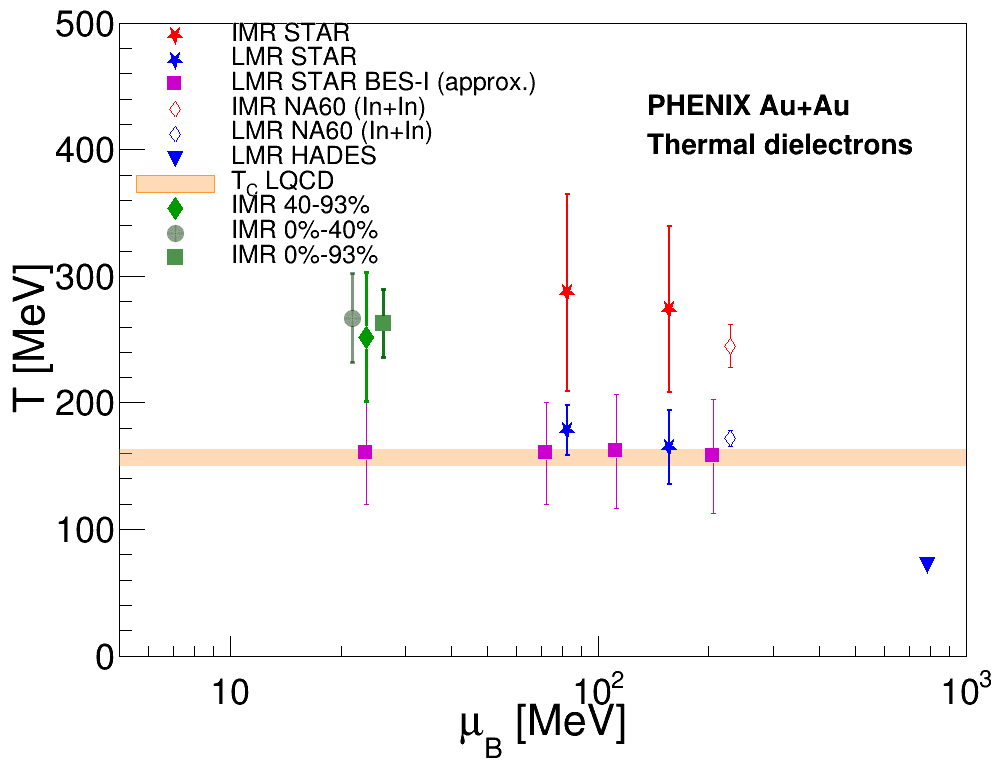

In [6]:
import ROOT as root
import numpy as np
import math

# --------------------------------------------------------------------
# Helper: µ_B(√s_NN) parameterization (Andronic et al.)
# µ_B(√s) [GeV] = a / (1 + b * √s),  a≈1.308 GeV, b≈0.273 GeV^-1
# We convert to MeV here.
# --------------------------------------------------------------------
def muB_mev(sNN_GeV):
    a = 1.308  # GeV
    b = 0.273  # 1/GeV
    return 1000.0 * a / (1.0 + b * sNN_GeV)

# √s_NN values used in Fig. 4
s_HADES  = 2.42
s_NA60   = 17.3
s_STAR27 = 27.0
s_STAR54 = 54.4
s_BES19  = 19.6
s_BES39  = 39.0
s_BES62  = 62.4
s_BES200 = 200.0

# --------------------------------------------------------------------
# µ_B positions in MeV (at chemical freeze-out)
# --------------------------------------------------------------------
mu_B_hades   = muB_mev(s_HADES)
mu_B_na60    = muB_mev(s_NA60)
mu_B_star27  = muB_mev(s_STAR27)
mu_B_star54  = muB_mev(s_STAR54)

# For STAR BES-I LMR points – approximate:
mu_B_star_bes = np.array([
    muB_mev(s_BES200),  # ≈ 24 MeV
    muB_mev(s_BES62),   # ≈ 73 MeV
    muB_mev(s_BES39),   # ≈112 MeV
    muB_mev(s_BES19),   # ≈206 MeV
])

# --------------------------------------------------------------------
# Temperatures and errors from the text (LMR & IMR)
#   LMR STAR 27 GeV:  165 ±20(stat) ±21(syst) MeV
#   LMR STAR 54.4 GeV:178 ±15(stat) ±13(syst) MeV
#   IMR STAR 27 GeV:  274 ±65(stat) ±10(syst) MeV
#   IMR STAR 54.4 GeV:287 ±70(stat) ±34(syst) MeV
#   LMR NA60:         172 ± 6 MeV
#   IMR NA60:         245 ±17 MeV
#   LMR HADES:        71.8 ±2.1 MeV
# We combine stat⊕syst in quadrature for a single symmetric error.
# --------------------------------------------------------------------
T_star_lmr   = np.array([178.0, 165.0])  # (54.4, 27) – we'll keep µ_B in same order below
T_star_lmr_err = np.array([
    math.sqrt(15.0**2 + 13.0**2),  # 54.4
    math.sqrt(20.0**2 + 21.0**2),  # 27
])

T_star_imr   = np.array([287.0, 274.0,])  # (54.4, 27)
T_star_imr_err = np.array([
    math.sqrt(70.0**2 + 34.0**2),  # 54.4
    math.sqrt(65.0**2 + 10.0**2),  # 27
])

T_na60_lmr      = np.array([172.0])
T_na60_lmr_err  = np.array([6.0])

T_na60_imr      = np.array([245.0])
T_na60_imr_err  = np.array([17.0])

T_hades_lmr     = np.array([71.8])
T_hades_lmr_err = np.array([2.1])

# --------------------------------------------------------------------
# APPROXIMATE STAR BES-I LMR points (from Fig. 4 *by eye*):
# they all sit close to the LQCD band around 155–165 MeV.
# Adjust later if/when you pull exact HEPData numbers.
# Order corresponds to mu_B_star_bes defined above.
# --------------------------------------------------------------------
T_star_bes_lmr = np.array([160.0, 160.0, 162.0, 158.0])
T_star_bes_lmr_err = np.array([40.0, 40.0, 45.0, 45.0])  # big errors as in the figure

# µ_B arrays for STAR LMR/IMR (54.4, 27) in same order as the T arrays
mu_B_star_pair = np.array([mu_B_star54, mu_B_star27])

# --------------------------------------------------------------------
# Your measurement (from fit_function: M^(3/2) * exp(-M/T))
# fit_function must already exist (e.g. from the IMR fit in your macro).
# --------------------------------------------------------------------
# Example:
# T_eff_yours = fit_function.GetParameter(1) * 1000.0  # GeV -> MeV
# T_eff_yours_err = fit_function.GetParError(1) * 1000.0
# mu_B_yours = muB_mev(200.0)  # if your point is Au+Au 200 GeV

# For now, put placeholders so the cell runs without your fit:
T_eff_yours      = np.array([252])  # placeholder values # bg 500. bg 300, 500, 300, bg mass
T_eff_yours_err  = np.array([51])
mu_B_yours       = np.array([muB_mev(200.0)])  # placeholder values
T_eff_avg = np.mean(T_eff_yours)
T_eff_err_avg = max(T_eff_yours_err)
std_dev = np.std(T_eff_yours)

print(f"Your T_eff measurement (placeholder): {T_eff_avg:.1f} ± {T_eff_err_avg:.1f} ± {std_dev:.1f} MeV")
print(f"STAR IMR: 54.4 GeV → {T_star_imr[0]:.1f} ± {T_star_imr_err[0]:.1f} MeV at µ_B≈{mu_B_star_pair[0]:.0f} MeV")
print(f"          27  GeV → {T_star_imr[1]:.1f} ± {T_star_imr_err[1]:.1f} MeV at µ_B≈{mu_B_star_pair[1]:.0f} MeV")

# --------------------------------------------------------------------
# Draw Fig. 4-style plot in ROOT
# --------------------------------------------------------------------
c_temp = root.TCanvas("c_Teff_comparison", "Temperature vs #mu_{B}", 1000, 800)
root.gPad.SetLogx()
#root.gPad.SetGridx()
#root.gPad.SetGridy()

frame = root.TH2F("frame", ";#mu_{B} [MeV];T [MeV]",
                  100, 5.0, 1000.0,
                  100, 0.0, 500.0)
root.gPad.SetLeftMargin(0.12);root.gPad.SetBottomMargin(0.15);root.gPad.SetRightMargin(0.03);root.gPad.SetTopMargin(0.03)
frame.GetXaxis().SetTitleSize(0.06);frame.GetYaxis().SetTitleSize(0.06);frame.GetXaxis().SetLabelSize(0.05);frame.GetYaxis().SetLabelSize(0.05);frame.GetYaxis().SetNdivisions(505)
frame.GetXaxis().CenterTitle(); frame.GetYaxis().CenterTitle()
frame.GetYaxis().SetTitleOffset(0.9)#;frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw()

# --- LQCD Tc band (approx 156 ± 5 MeV) ---
box_lqcd = root.TBox(5.0, 150.0, 1000.0, 163.0)
box_lqcd.SetFillColorAlpha(root.kOrange + 1, 0.35)
box_lqcd.SetLineColor(root.kOrange + 1)
box_lqcd.Draw("same")

# --- STAR IMR (red stars) ---
gr_star_imr = root.TGraphErrors(len(mu_B_star_pair))
for i in range(len(mu_B_star_pair)):
    gr_star_imr.SetPoint(i, mu_B_star_pair[i], T_star_imr[i])
    gr_star_imr.SetPointError(i, 0.0, T_star_imr_err[i])
gr_star_imr.SetMarkerStyle(29)
gr_star_imr.SetMarkerColor(root.kRed)
gr_star_imr.SetMarkerSize(2.5)
gr_star_imr.SetLineColor(root.kRed)
gr_star_imr.SetLineWidth(2)
gr_star_imr.Draw("P same")

# --- STAR LMR (blue stars) ---
gr_star_lmr = root.TGraphErrors(len(mu_B_star_pair))
for i in range(len(mu_B_star_pair)):
    gr_star_lmr.SetPoint(i, mu_B_star_pair[i], T_star_lmr[i])
    gr_star_lmr.SetPointError(i, 0.0, T_star_lmr_err[i])
gr_star_lmr.SetMarkerStyle(29)
gr_star_lmr.SetMarkerColor(root.kBlue)
gr_star_lmr.SetMarkerSize(2.5)
gr_star_lmr.SetLineColor(root.kBlue)
gr_star_lmr.SetLineWidth(2)
gr_star_lmr.Draw("P same")

# --- NA60 IMR (open red diamond) ---
gr_na60_imr = root.TGraphErrors(1)
gr_na60_imr.SetPoint(0, mu_B_na60, T_na60_imr[0])
gr_na60_imr.SetPointError(0, 0.0, T_na60_imr_err[0])
gr_na60_imr.SetMarkerStyle(27)
gr_na60_imr.SetMarkerColor(root.kRed)
gr_na60_imr.SetMarkerSize(2.0)
gr_na60_imr.SetLineColor(root.kRed)
gr_na60_imr.Draw("P same")

# --- NA60 LMR (open blue diamond) ---
gr_na60_lmr = root.TGraphErrors(1)
gr_na60_lmr.SetPoint(0, mu_B_na60, T_na60_lmr[0])
gr_na60_lmr.SetPointError(0, 0.0, T_na60_lmr_err[0])
gr_na60_lmr.SetMarkerStyle(27)
gr_na60_lmr.SetMarkerColor(root.kBlue)
gr_na60_lmr.SetMarkerSize(2.0)
gr_na60_lmr.SetLineColor(root.kBlue)
gr_na60_lmr.Draw("P same")

# --- HADES LMR (inverted blue triangle) ---
gr_hades = root.TGraphErrors(1)
gr_hades.SetPoint(0, mu_B_hades, T_hades_lmr[0])
gr_hades.SetPointError(0, 0.0, T_hades_lmr_err[0])
gr_hades.SetMarkerStyle(23)
gr_hades.SetMarkerColor(root.kBlue)
gr_hades.SetMarkerSize(2.0)
gr_hades.SetLineColor(root.kBlue)
gr_hades.Draw("P same")

# --- STAR BES-I LMR (magenta squares, approximate) ---
gr_star_bes_lmr = root.TGraphErrors(len(mu_B_star_bes))
for i in range(len(mu_B_star_bes)):
    gr_star_bes_lmr.SetPoint(i, mu_B_star_bes[i], T_star_bes_lmr[i])
    gr_star_bes_lmr.SetPointError(i, 0.0, T_star_bes_lmr_err[i])
gr_star_bes_lmr.SetMarkerStyle(21)
gr_star_bes_lmr.SetMarkerColor(root.kMagenta + 1)
gr_star_bes_lmr.SetMarkerSize(1.8)
gr_star_bes_lmr.SetLineColor(root.kMagenta + 1)
gr_star_bes_lmr.Draw("P same")

# --- Your IMR point (green star) ---
gr_yours = root.TGraphErrors(len(mu_B_yours))
for i in range(len(mu_B_yours)):
    gr_yours.SetPoint(i, mu_B_yours[i], T_eff_yours[i])
    gr_yours.SetPointError(i, 0.0, T_eff_yours_err[i])
gr_yours.SetMarkerStyle(33)
gr_yours.SetMarkerColor(root.kGreen + 2)
gr_yours.SetMarkerSize(3.0)
gr_yours.SetLineColor(root.kGreen + 2)
gr_yours.SetLineWidth(3)
gr_yours.Draw("P same")

gr_my_average = root.TGraphErrors(1)
gr_my_average.SetPoint(0, np.mean(muB_mev(220)), 267)
gr_my_average.SetPointError(0, 0.0, 35)
gr_my_average.SetMarkerStyle(20)
gr_my_average.SetMarkerColorAlpha(root.kGreen + 4, 0.7)
gr_my_average.SetMarkerSize(2.0)
gr_my_average.SetLineColorAlpha(root.kGreen + 4, 0.5)
gr_my_average.SetLineWidth(3)
gr_my_average.Draw("P same")
gr_my_average_std = root.TGraphErrors(1)
gr_my_average_std.SetFillColorAlpha(root.kGreen + 4, 0.35)
gr_my_average_std = root.TGraphErrors(1)
gr_my_average_std.SetPoint(0, np.mean(muB_mev(180)), 263)
gr_my_average_std.SetPointError(0, 0, 27)
gr_my_average_std.SetMarkerStyle(21)
gr_my_average_std.SetMarkerColorAlpha(root.kGreen + 3, 0.7)
gr_my_average_std.SetMarkerSize(2.0)
gr_my_average_std.SetLineColorAlpha(root.kGreen + 3, 0.9)
gr_my_average_std.SetLineWidth(3)
gr_my_average_std.Draw("p same")

# --------------------------------------------------------------------
# Legend (you probably already have Format_Legend; if not, just set basics)
# --------------------------------------------------------------------
legend_temp = root.TLegend(0.12, 0.65, 0.57, 0.97)
legend_temp.SetBorderSize(0)
legend_temp.SetFillStyle(0)
legend_temp.SetTextSize(0.035)
legend_temp.AddEntry(gr_star_imr,      "IMR STAR",             "p")
legend_temp.AddEntry(gr_star_lmr,      "LMR STAR",             "p")
legend_temp.AddEntry(gr_star_bes_lmr,  "LMR STAR BES-I (approx.)", "p")
legend_temp.AddEntry(gr_na60_imr,      "IMR NA60 (In+In)",     "p")
legend_temp.AddEntry(gr_na60_lmr,      "LMR NA60 (In+In)",     "p")
legend_temp.AddEntry(gr_hades,         "LMR HADES",            "p")
legend_temp.AddEntry(box_lqcd,         "T_{C} LQCD",           "f")
legend_temp.AddEntry(gr_yours,         "IMR 40-93%",        "p")
legend_temp.AddEntry(gr_my_average,  f"IMR 0%-40%", "p")
legend_temp.AddEntry(gr_my_average_std,  f"IMR 0%-93%", "p")
#legend_temp.AddEntry(gr_my_average,f"Average {T_eff_avg:.0f} #pm {T_eff_err_avg:.0f} #pm {std_dev:.0f} MeV","pef")
legend_temp.Draw()

text = root.TLatex()
text.SetNDC()
text.SetTextSize(0.04)
text.DrawLatex(0.65, 0.85, "PHENIX Au+Au")
text.DrawLatex(0.65, 0.80, "Thermal dielectrons")
#root.gStyle.SetOptStat(0)
c_temp.Draw()
#c_temp.SaveAs("output/Teff_vs_muB.pdf")
